In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# https://github.com/shakedzy/dython/blob/master/dython/examples.py
from dython import nominal
warnings.filterwarnings('ignore')

In [45]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_data = pd.read_csv("sample_submission_lfbv3c3.csv")
train_data['source'] = 'train'
test_data['source'] = 'test'
df = pd.concat([train_data, test_data])
df_copy =  df.copy()

In [46]:
df['source'].value_counts()

train    318438
test     137057
Name: source, dtype: int64

In [47]:
from statsmodels.graphics.gofplots import qqplot
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


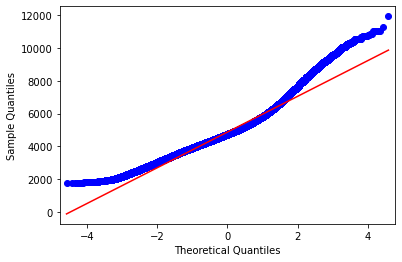

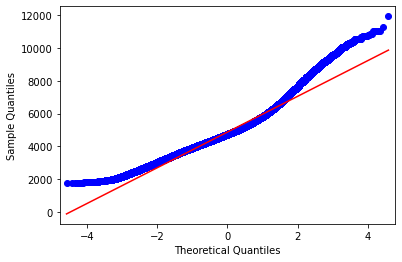

In [48]:
qqplot(df['Admission_Deposit'], line='s')

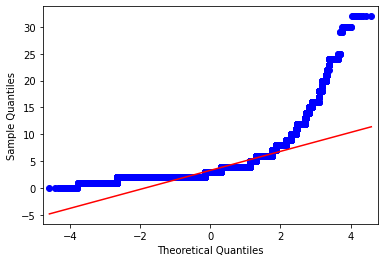

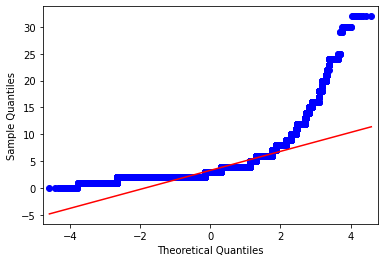

In [49]:
qqplot(df['Visitors with Patient'], line='s')

(array([2.84233e+05, 1.53822e+05, 1.23940e+04, 3.45100e+03, 7.28000e+02,
        5.48000e+02, 1.50000e+02, 1.21000e+02, 0.00000e+00, 4.80000e+01]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

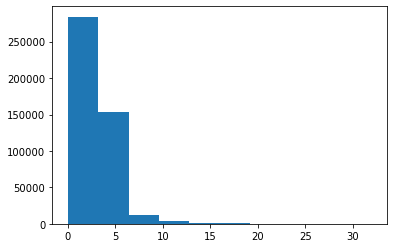

In [50]:
plt.hist(df['Visitors with Patient'])


(array([2.84233e+05, 1.53822e+05, 1.23940e+04, 3.45100e+03, 7.28000e+02,
        5.48000e+02, 1.50000e+02, 1.21000e+02, 0.00000e+00, 4.80000e+01]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

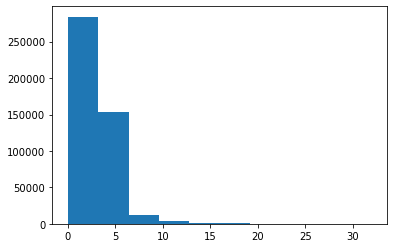

In [51]:
plt.hist(df['Visitors with Patient'])


(array([1.48901e+05, 2.61946e+05, 4.27120e+04, 1.79500e+03, 1.13000e+02,
        2.10000e+01, 0.00000e+00, 0.00000e+00, 6.00000e+00, 1.00000e+00]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

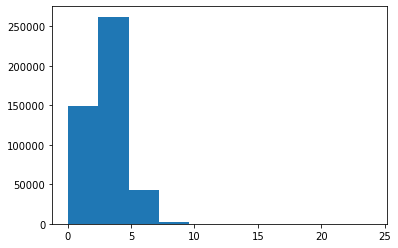

In [52]:
plt.hist(df['Available Extra Rooms in Hospital'])


# EDA

In [53]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


In [54]:
df.shape

(455495, 19)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            455495 non-null  int64  
 1   Hospital_code                      455495 non-null  int64  
 2   Hospital_type_code                 455495 non-null  object 
 3   City_Code_Hospital                 455495 non-null  int64  
 4   Hospital_region_code               455495 non-null  object 
 5   Available Extra Rooms in Hospital  455495 non-null  int64  
 6   Department                         455495 non-null  object 
 7   Ward_Type                          455495 non-null  object 
 8   Ward_Facility_Code                 455495 non-null  object 
 9   Bed Grade                          455347 non-null  float64
 10  patientid                          455495 non-null  int64  
 11  City_Code_Patient                  4488

In [56]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,455495.00000,455495.000000,455495.000000,455495.000000,455347.000000,455495.000000,448806.000000,455495.000000,455495.000000
mean,227748.00000,18.326335,4.767798,3.196140,2.628420,65786.793563,7.249495,3.284229,4877.434022
std,131490.22477,8.634036,3.102450,1.166994,0.871997,37968.830850,4.758941,1.768044,1084.982089
min,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,113874.50000,11.000000,2.000000,2.000000,2.000000,32874.000000,4.000000,2.000000,4184.000000
50%,227748.00000,19.000000,5.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4738.000000
75%,341621.50000,26.000000,7.000000,4.000000,3.000000,98576.500000,8.000000,4.000000,5405.000000
max,455495.00000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11920.000000


In [57]:
grp_visitors = df.groupby(['Stay'])['Visitors with Patient'].mean().reset_index()

In [58]:
grp_visitors.head()

,Stay,Visitors with Patient
0,0-10,2.565158
1,11-20,2.738940
2,21-30,2.679487
3,31-40,3.453797
4,41-50,3.032785


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0-10'),
  Text(1, 0, '11-20'),
  Text(2, 0, '21-30'),
  Text(3, 0, '31-40'),
  Text(4, 0, '41-50'),
  Text(5, 0, '51-60'),
  Text(6, 0, '61-70'),
  Text(7, 0, '71-80'),
  Text(8, 0, '81-90'),
  Text(9, 0, '91-100'),
  Text(10, 0, 'More than 100 Days')])

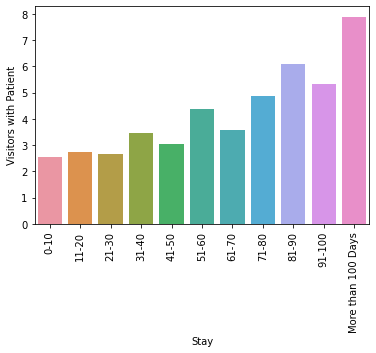

In [59]:
sns.barplot(x='Stay', y='Visitors with Patient', data=grp_visitors)
plt.xticks(rotation=90)

In [60]:
grp_deposit_amt = df.groupby(['Stay'])['Admission_Deposit'].mean().reset_index()

In [61]:
grp_deposit_amt.head()

,Stay,Admission_Deposit
0,0-10,4615.214625
1,11-20,4931.124829
2,21-30,5025.310329
3,31-40,4871.071067
4,41-50,4888.818530


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0-10'),
  Text(1, 0, '11-20'),
  Text(2, 0, '21-30'),
  Text(3, 0, '31-40'),
  Text(4, 0, '41-50'),
  Text(5, 0, '51-60'),
  Text(6, 0, '61-70'),
  Text(7, 0, '71-80'),
  Text(8, 0, '81-90'),
  Text(9, 0, '91-100'),
  Text(10, 0, 'More than 100 Days')])

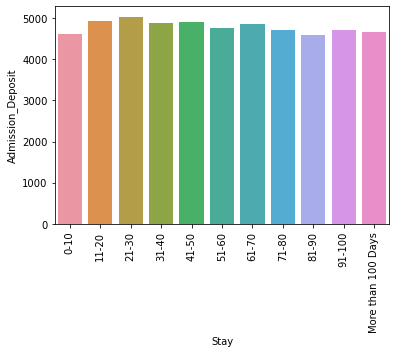

In [62]:
sns.barplot(x='Stay', y='Admission_Deposit', data=grp_deposit_amt)
plt.xticks(rotation=90)

### Univariate Analysis (Frequency tables/charts)

In [577]:
df_eda = df.drop(columns=['case_id', 'Admission_Deposit', 'source', 'Stay', 'patientid'])

In [578]:
df_eda.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60


The percent of values in each group of Hospital_code is as follows
The percent of values in each group of Hospital_type_code is as follows
The percent of values in each group of City_Code_Hospital is as follows
The percent of values in each group of Hospital_region_code is as follows
The percent of values in each group of Available Extra Rooms in Hospital is as follows
The percent of values in each group of Department is as follows
The percent of values in each group of Ward_Type is as follows
The percent of values in each group of Ward_Facility_Code is as follows
The percent of values in each group of Bed Grade is as follows
The percent of values in each group of patientid is as follows
The percent of values in each group of City_Code_Patient is as follows
The percent of values in each group of Type of Admission is as follows
The percent of values in each group of Severity of Illness is as follows
The percent of values in each group of Visitors with Patient is as follows
The percent o

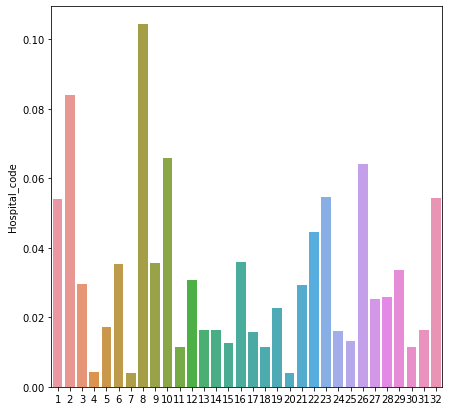

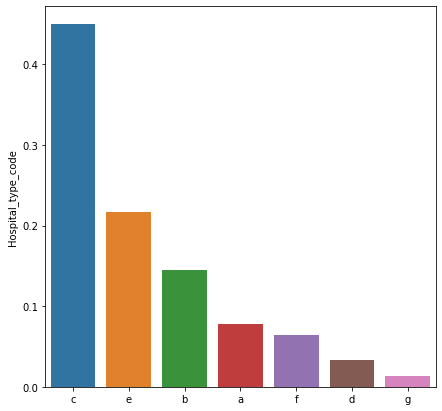

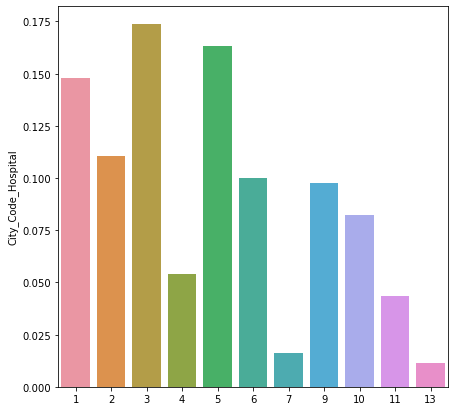

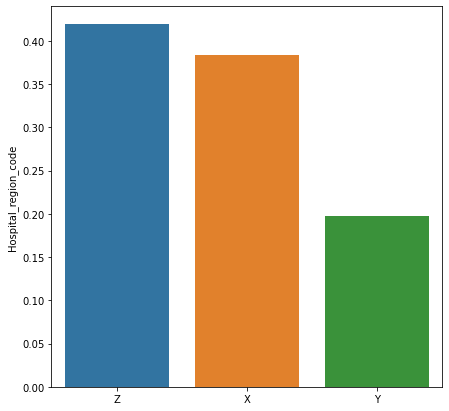

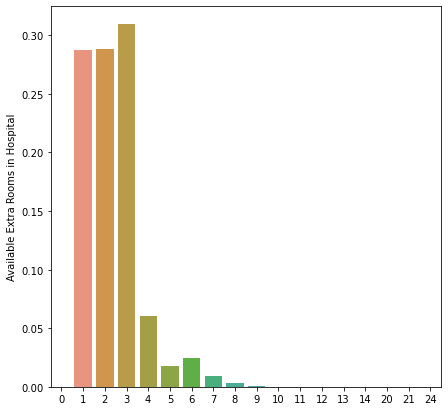

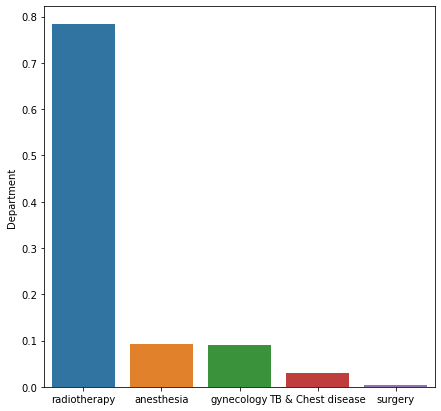

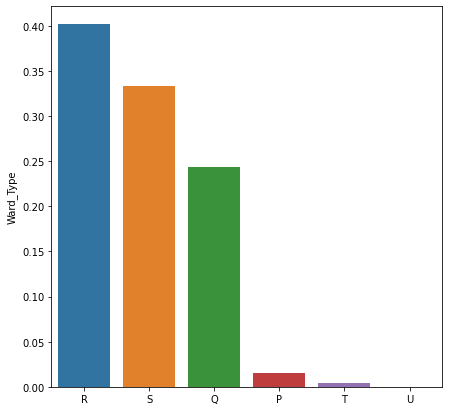

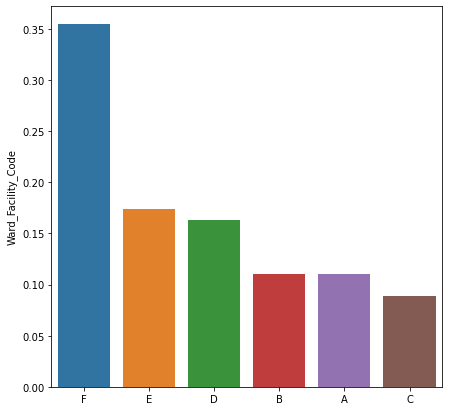

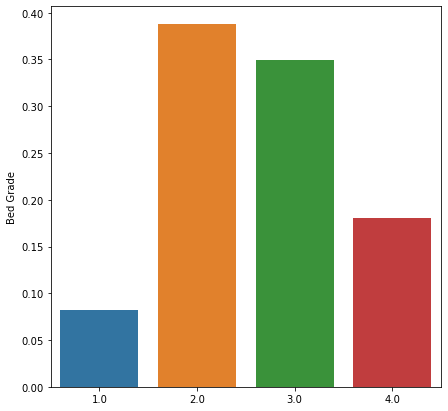

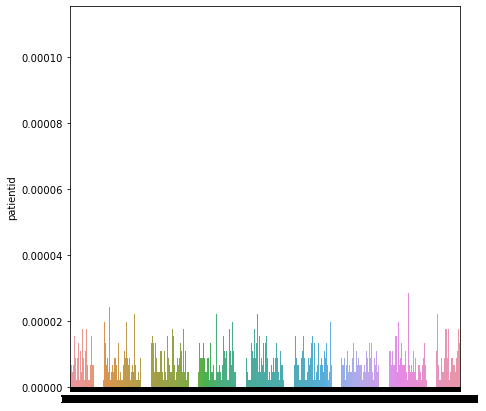

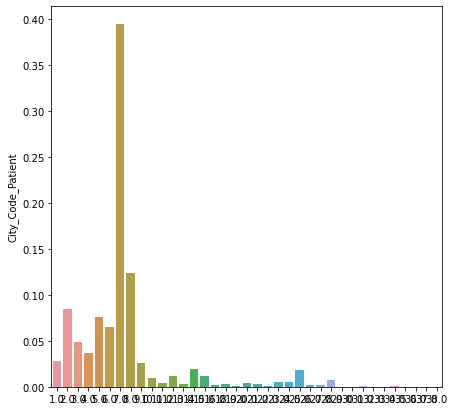

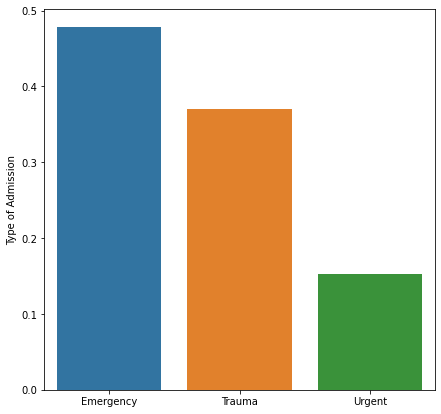

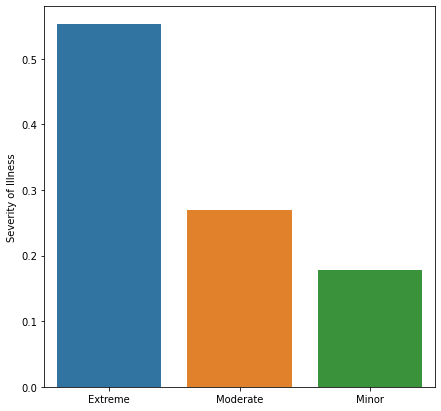

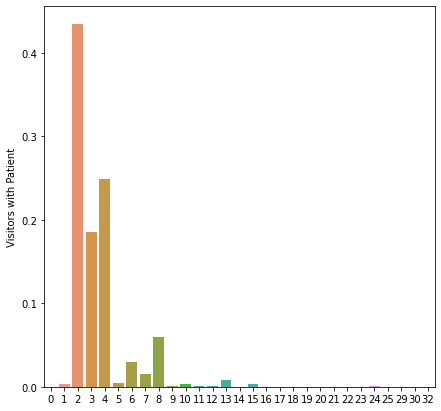

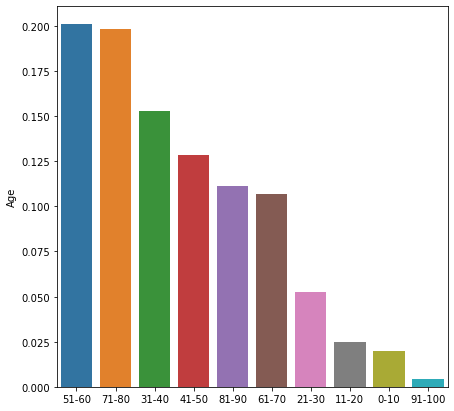

In [247]:
for cols in df_eda.columns:
    plt.figure(figsize=(7,7))
    print("The percent of values in each group of {} is as follows".format(cols))
    if df[cols].isna().sum() !=0:
        col_data = df[cols].dropna()
    else:
        col_data = df[cols]
    sns.barplot(x=col_data.unique(), y=col_data.value_counts(normalize=True))

### Bi-Variate Analysis

In [14]:
sns.barplot(x=df['Stay'], y=grp_visitors)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 504x1080 with 0 Axes>

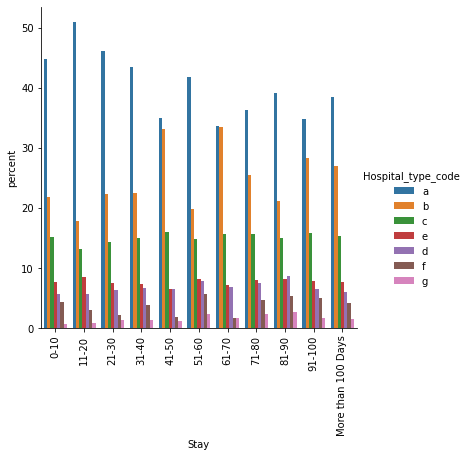

<Figure size 504x1080 with 0 Axes>

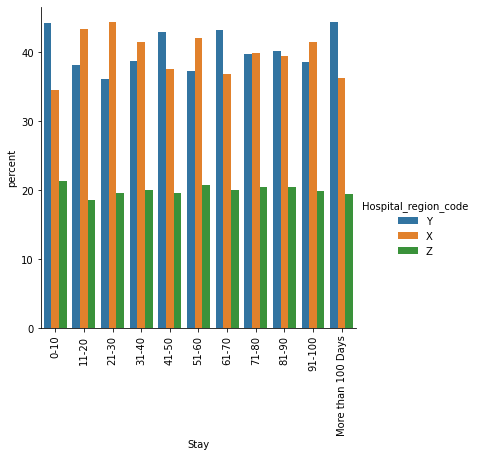

<Figure size 504x1080 with 0 Axes>

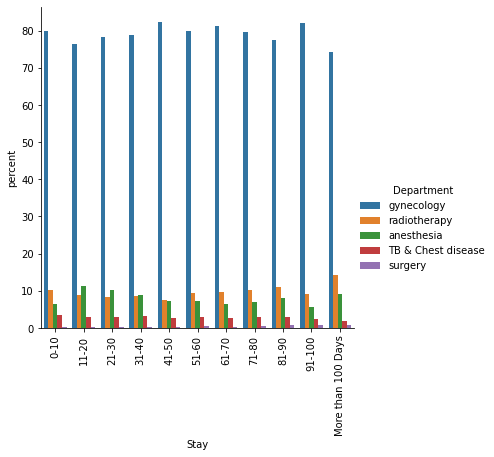

<Figure size 504x1080 with 0 Axes>

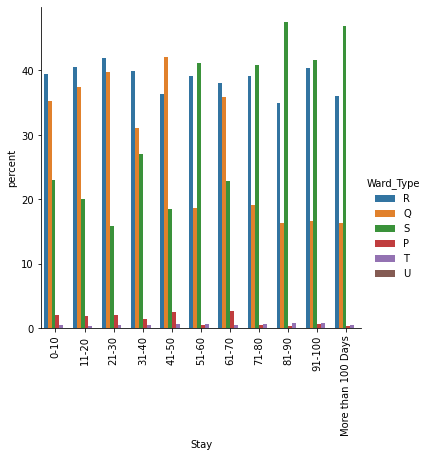

<Figure size 504x1080 with 0 Axes>

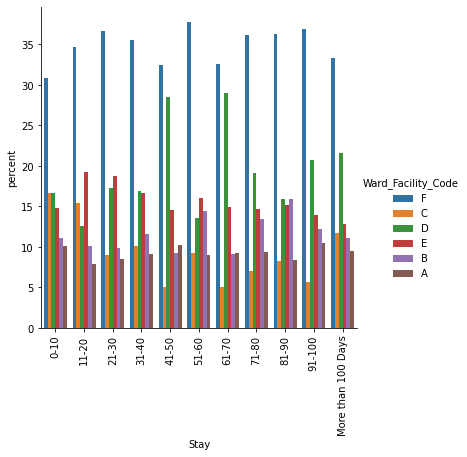

<Figure size 504x1080 with 0 Axes>

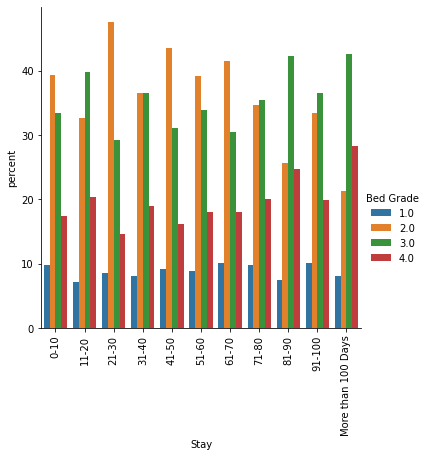

<Figure size 504x1080 with 0 Axes>

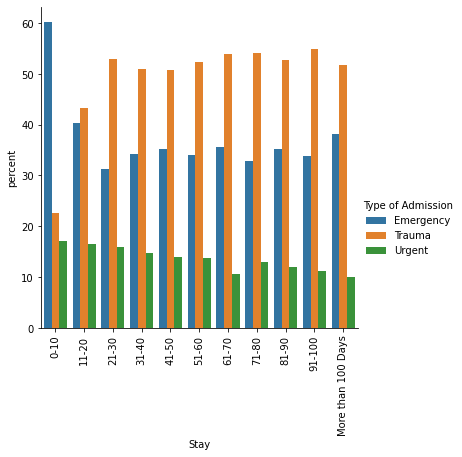

<Figure size 504x1080 with 0 Axes>

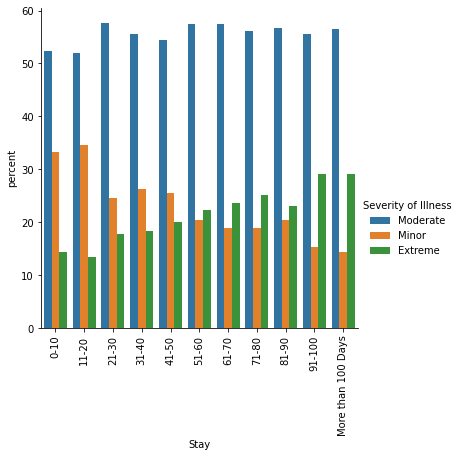

<Figure size 504x1080 with 0 Axes>

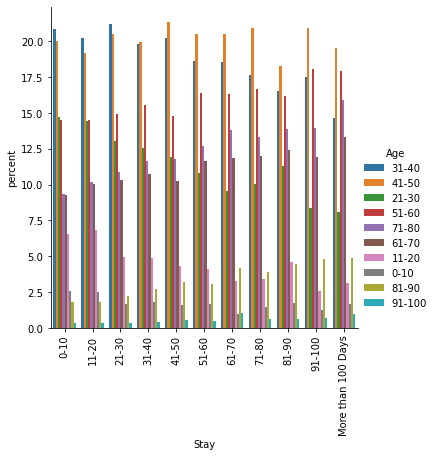

<Figure size 504x1080 with 0 Axes>

In [304]:
train_data_eda = train_data.loc[:,['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
                                           'Ward_Facility_Code', 'Bed Grade', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay' ]]
for cols in train_data_eda:
        plt.figure(figsize=(7,15))
        x,y = 'Stay', cols
        if x!=y:
            (train_data_eda
            .groupby(x)[y]
            .value_counts(normalize=True) 
            .mul(100)
            .rename('percent')
            .reset_index()
            .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
            plt.xticks(rotation=90)

# Pre-Processing

In [63]:
df['case_id'].value_counts()
print("No. of categories for case_id ", df['case_id'].value_counts().count())
# It is serial num that we may not need for our prediction

No. of categories for case_id  455495


In [64]:
print(df['Hospital_code'].value_counts())
print("No. of categories for hospital_code ", df['Hospital_code'].value_counts().count())


26    47523
23    38220
19    30036
6     29221
11    24827
14    24715
28    24572
27    20243
9     16360
12    16170
29    16158
32    15252
25    14046
10    13538
15    13326
21    11784
24    11467
3     10277
17     7844
1      7460
5      7448
13     7432
2      7277
30     7215
22     6006
31     5740
8      5284
16     5244
18     5228
20     1962
7      1871
4      1749
Name: Hospital_code, dtype: int64
No. of categories for hospital_code  32


In [65]:
print(df['Hospital_type_code'].value_counts())
print("No. of categories for Hospital_type_code ", df['Hospital_type_code'].value_counts().count())


a    204730
b     98884
c     66147
e     35428
d     29048
f     15252
g      6006
Name: Hospital_type_code, dtype: int64
No. of categories for Hospital_type_code  7


In [66]:
print(df['City_Code_Hospital'].value_counts())
print("No. of categories for City_Code_Hospital ", df['City_Code_Hospital'].value_counts().count())


1     79058
2     74312
6     67441
7     50279
3     45544
5     44395
9     37428
11    24572
4     19778
10     7460
13     5228
Name: City_Code_Hospital, dtype: int64
No. of categories for City_Code_Hospital  11


In [67]:

print(df['Hospital_region_code'].value_counts())
print("No. of categories for Hospital_region_code ", df['Hospital_region_code'].value_counts().count())

X    190849
Y    174707
Z     89939
Name: Hospital_region_code, dtype: int64
No. of categories for Hospital_region_code  3


In [68]:

print(df['Available Extra Rooms in Hospital'].value_counts())
print("No. of categories for Available Extra Rooms in Hospital  ", df['Available Extra Rooms in Hospital'].value_counts().count())

2     140895
4     131191
3     130755
5      27602
6      11003
1       7984
7       4107
8       1468
9        327
10        89
11        24
0         22
12        17
21         4
13         3
20         2
14         1
24         1
Name: Available Extra Rooms in Hospital, dtype: int64
No. of categories for Available Extra Rooms in Hospital   18


In [69]:

print(df['Department'].value_counts())
print("No. of categories for Department ", df['Department'].value_counts().count())

gynecology            356688
anesthesia             42358
radiotherapy           41033
TB & Chest disease     13751
surgery                 1665
Name: Department, dtype: int64
No. of categories for Department  5


In [70]:
print(df['Ward_Type'].value_counts())
print("No. of categories for Ward_Type ", df['Ward_Type'].value_counts().count())

R    182939
Q    152046
S    111166
P      7199
T      2133
U        12
Name: Ward_Type, dtype: int64
No. of categories for Ward_Type  6


In [71]:

print(df['Ward_Facility_Code'].value_counts())
print("No. of categories for Ward_Facility_Code ", df['Ward_Facility_Code'].value_counts().count())

F    161470
E     79058
D     74312
C     50279
B     50116
A     40260
Name: Ward_Facility_Code, dtype: int64
No. of categories for Ward_Facility_Code  6


In [72]:
# df['Bed Grade'] = df['Bed Grade'].fillna(0)
# df['Bed Grade'] = df['Bed Grade'].astype('int')
print(df['Bed Grade'].value_counts())
print("No. of categories for Bed Grade ", df['Bed Grade'].value_counts().count())

# We need to replace the unknowns (0) later

2.0    176451
3.0    158942
4.0     82387
1.0     37567
Name: Bed Grade, dtype: int64
No. of categories for Bed Grade  4


In [73]:

print(df['patientid'].value_counts())
print("No. of categories for patientid ", df['patientid'].value_counts().count())

66714     50
91292     43
38525     39
114456    37
101359    36
          ..
39229      1
69775      1
43323      1
123025     1
95747      1
Name: patientid, Length: 131624, dtype: int64
No. of categories for patientid  131624


In [74]:

print(df['City_Code_Patient'].value_counts())
print("No. of categories for City_Code_Patient ", df['City_Code_Patient'].value_counts().count())
print("There are {} np.nan values".format(df['City_Code_Patient'].isna().sum()))

8.0     176825
2.0      55681
1.0      37772
7.0      33958
5.0      28978
4.0      22044
9.0      16692
15.0     12804
10.0     11809
6.0       8723
12.0      8124
3.0       5401
23.0      5320
14.0      4218
16.0      3187
21.0      2298
13.0      2228
18.0      2010
20.0      1936
26.0      1522
19.0      1458
25.0      1171
27.0      1032
11.0       933
28.0       714
22.0       534
24.0       514
30.0       194
29.0       192
33.0       121
34.0        96
32.0        95
37.0        78
31.0        67
35.0        30
36.0        29
38.0        18
Name: City_Code_Patient, dtype: int64
No. of categories for City_Code_Patient  37
There are 6689 np.nan values


In [75]:
print(df['Visitors with Patient'].value_counts())
print("No. of categories for Visitors with Patient ", df['Visitors with Patient'].value_counts().count())

2     197734
4     113497
3      84689
6      27011
5      13314
8       6920
7       3556
9       1918
1       1776
10      1632
12      1376
11       443
16       408
14       310
15       271
13       147
20       100
24        99
18        94
0         34
22        26
30        26
17        25
21        24
19        21
25        12
32        12
23        10
29        10
Name: Visitors with Patient, dtype: int64
No. of categories for Visitors with Patient  29


In [76]:
print(df['Type of Admission'].value_counts())
print("No. of categories for Type of Admission ", df['Type of Admission'].value_counts().count())

Trauma       217672
Emergency    168363
Urgent        69460
Name: Type of Admission, dtype: int64
No. of categories for Type of Admission  3


In [77]:
print(df['Age'].value_counts())
print("No. of categories for Age ", df['Age'].value_counts().count())

41-50     91495
31-40     90420
51-60     69506
21-30     58560
71-80     50737
61-70     48619
11-20     23871
81-90     11240
0-10       9140
91-100     1907
Name: Age, dtype: int64
No. of categories for Age  10


In [78]:

print(df['Severity of Illness'].value_counts())
print("No. of categories for Severity of Illness ", df['Severity of Illness'].value_counts().count())

Moderate    251565
Minor       122735
Extreme      81195
Name: Severity of Illness, dtype: int64
No. of categories for Severity of Illness  3


In [79]:
# sns.countplot(hue='Bed Grade',x='Severity of Illness', data=df)
# We do not see any direct relation between ward_tpe and bed type

In [80]:
# sns.countplot(hue='Bed Grade',x='Severity of Illness', data=df)

In [81]:
# sns.countplot(hue='Bed Grade',x='Department', data=df)


In [82]:
# sns.countplot(hue='Bed Grade',x='Type of Admission', data=df)

<AxesSubplot:xlabel='Bed Grade', ylabel='Admission_Deposit'>

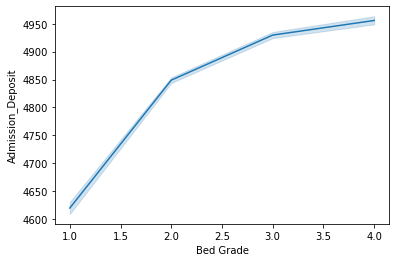

In [83]:
sns.lineplot(x='Bed Grade',
                y= 'Admission_Deposit',
                data=df)

In [676]:
# df['Bed Grade'] = df.groupby(['Severity of Illness','Department'])['Bed Grade'].transform(lambda x: x.fillna(x.mode()[0]))

In [84]:
df['Age'] = df['Age'].replace({'91-100':'Above_70','81-90': 'Above_70', '71-80': 'Above_70', '0-10':'Below_20', '11-20':'Below_20'})

In [85]:
bed_grade_mode = df['Bed Grade'].mode()[0]

In [86]:
df['Bed Grade'] = df['Bed Grade'].fillna(bed_grade_mode)

In [87]:
df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0], inplace=True)                  

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            455495 non-null  int64  
 1   Hospital_code                      455495 non-null  int64  
 2   Hospital_type_code                 455495 non-null  object 
 3   City_Code_Hospital                 455495 non-null  int64  
 4   Hospital_region_code               455495 non-null  object 
 5   Available Extra Rooms in Hospital  455495 non-null  int64  
 6   Department                         455495 non-null  object 
 7   Ward_Type                          455495 non-null  object 
 8   Ward_Facility_Code                 455495 non-null  object 
 9   Bed Grade                          455495 non-null  float64
 10  patientid                          455495 non-null  int64  
 11  City_Code_Patient                  4554

In [89]:
print("No. of categories for City_Code_Patient ", df['City_Code_Patient'].value_counts().count())
print(df['City_Code_Patient'].describe())

No. of categories for City_Code_Patient  37
count    455495.000000
mean          7.260517
std           4.724731
min           1.000000
25%           4.000000
50%           8.000000
75%           8.000000
max          38.000000
Name: City_Code_Patient, dtype: float64


In [90]:
print("No. of categories for City_Code_Hospital ", df['City_Code_Hospital'].value_counts().count())
print(df['City_Code_Hospital'].describe())

No. of categories for City_Code_Hospital  11
count    455495.000000
mean          4.767798
std           3.102450
min           1.000000
25%           2.000000
50%           5.000000
75%           7.000000
max          13.000000
Name: City_Code_Hospital, dtype: float64


In [91]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,Below_20,3510.0,NaN,test
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,Below_20,7190.0,NaN,test
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


In [92]:
# associations(df, theil_u=True, figsize=(15, 15))

### Finding Correlation between the categorical columns

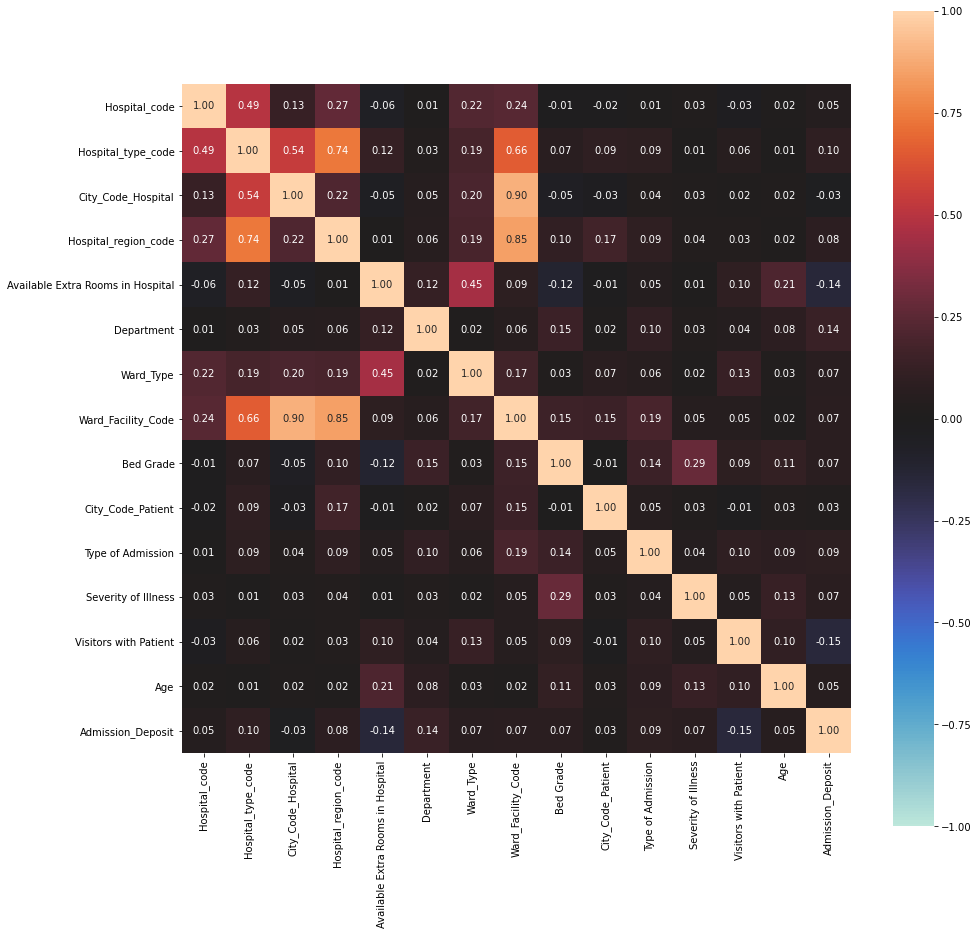

{'corr':                                    Hospital_code  Hospital_type_code  \
 Hospital_code                           1.000000            0.492564   
 Hospital_type_code                      0.492564            1.000000   
 City_Code_Hospital                      0.127760            0.542063   
 Hospital_region_code                    0.272672            0.739330   
 Available Extra Rooms in Hospital      -0.058744            0.117594   
 Department                              0.014449            0.031616   
 Ward_Type                               0.219880            0.186409   
 Ward_Facility_Code                      0.238143            0.657313   
 Bed Grade                              -0.014664            0.066749   
 City_Code_Patient                      -0.015171            0.094740   
 Type of Admission                       0.014714            0.091329   
 Severity of Illness                     0.029961            0.014393   
 Visitors with Patient                  -0.

In [32]:
df_corr = df.drop(columns=['source', 'Stay', 'case_id', 'patientid'])
nominal.associations(df_corr, theil_u=False, figsize=(15, 15))

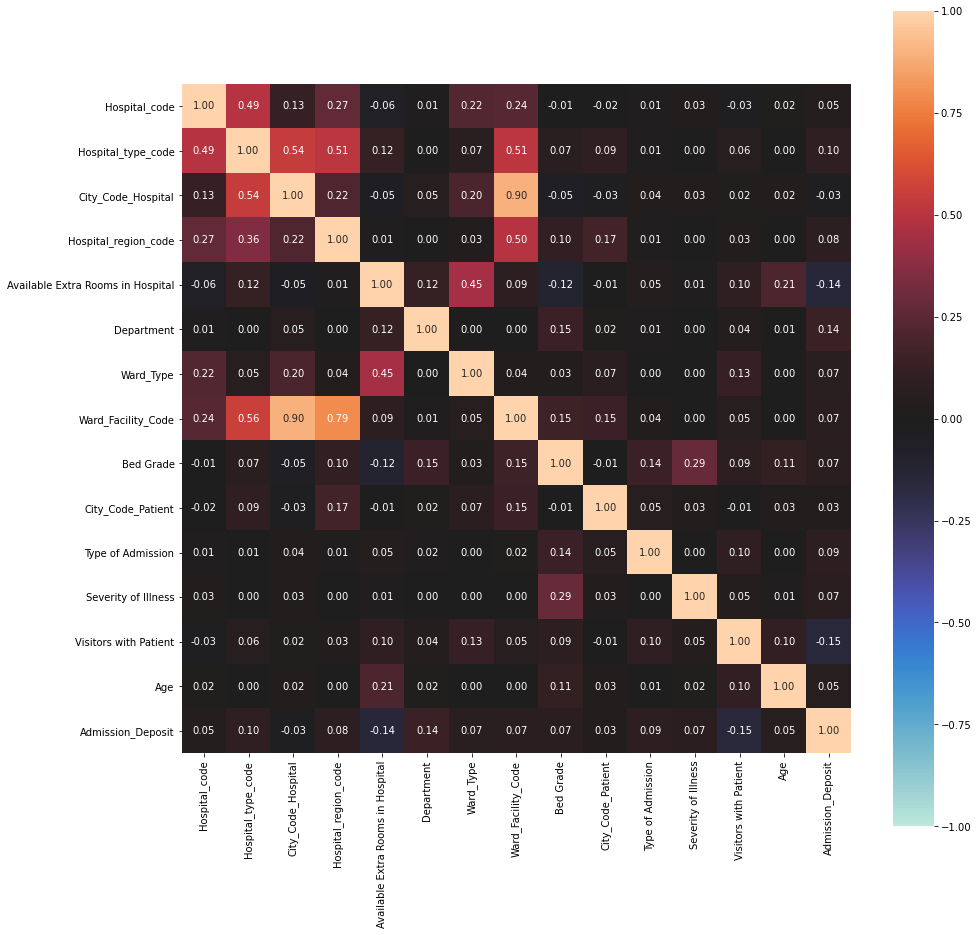

{'corr':                                    Hospital_code  Hospital_type_code  \
 Hospital_code                           1.000000            0.492564   
 Hospital_type_code                      0.492564            1.000000   
 City_Code_Hospital                      0.127760            0.542063   
 Hospital_region_code                    0.272672            0.356209   
 Available Extra Rooms in Hospital      -0.058744            0.117594   
 Department                              0.014449            0.001363   
 Ward_Type                               0.219880            0.054120   
 Ward_Facility_Code                      0.238143            0.561788   
 Bed Grade                              -0.014664            0.066749   
 City_Code_Patient                      -0.015171            0.094740   
 Type of Admission                       0.014714            0.005458   
 Severity of Illness                     0.029961            0.000144   
 Visitors with Patient                  -0.

In [687]:
nominal.associations(df_corr, theil_u=True, figsize=(15, 15))

In [688]:
# We can keep ward_facility_code and discard other Hospital_type_code, City_Code_Hospital, Hospital_region_code

### Feature Engineering

In [93]:
df_drop_correlated_cols = df.drop(columns=['Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'case_id', 'patientid'])

In [94]:
def bucketing(x):
    if x<=2000:
        return "2000"
    elif x>2000 and x<=5000:
        return "5000"
    elif x>5000 and x<=8000:
        return "8000"
    elif x>8000 and x<=11000:
        return "11000"
    elif x>11000 and x<=15000:
        return "15000"
    else:
        return "above 15000"

In [95]:
df_drop_correlated_cols['mask'] = df_drop_correlated_cols.Hospital_code.map(df_drop_correlated_cols.Hospital_code.value_counts())


In [96]:
df_drop_correlated_cols.head()

,Hospital_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source,mask
0,8,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train,5284
1,2,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train,7277
2,10,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train,13538
3,26,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train,47523
4,26,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train,47523


In [97]:
df_drop_correlated_cols['hospital_code_new'] = df_drop_correlated_cols['mask'].apply(lambda x: bucketing(x))

In [98]:
df_drop_correlated_cols['hospital_code_new'].value_counts()

above 15000    303297
8000            72178
15000           64161
11000           10277
2000             5582
Name: hospital_code_new, dtype: int64

In [99]:
df_drop_correlated_cols.drop(columns=['mask', 'Hospital_code'], inplace=True)

In [100]:
df_drop_correlated_cols.head()

,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source,hospital_code_new
0,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train,8000
1,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train,8000
2,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train,15000
3,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train,above 15000
4,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train,above 15000


In [101]:
df_drop_correlated_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  455495 non-null  int64  
 1   Department                         455495 non-null  object 
 2   Ward_Type                          455495 non-null  object 
 3   Ward_Facility_Code                 455495 non-null  object 
 4   Bed Grade                          455495 non-null  float64
 5   City_Code_Patient                  455495 non-null  float64
 6   Type of Admission                  455495 non-null  object 
 7   Severity of Illness                455495 non-null  object 
 8   Visitors with Patient              455495 non-null  int64  
 9   Age                                455495 non-null  object 
 10  Admission_Deposit                  455495 non-null  float64
 11  Stay                               3184

In [102]:
df['City_Code_Patient'].value_counts()

8.0     183514
2.0      55681
1.0      37772
7.0      33958
5.0      28978
4.0      22044
9.0      16692
15.0     12804
10.0     11809
6.0       8723
12.0      8124
3.0       5401
23.0      5320
14.0      4218
16.0      3187
21.0      2298
13.0      2228
18.0      2010
20.0      1936
26.0      1522
19.0      1458
25.0      1171
27.0      1032
11.0       933
28.0       714
22.0       534
24.0       514
30.0       194
29.0       192
33.0       121
34.0        96
32.0        95
37.0        78
31.0        67
35.0        30
36.0        29
38.0        18
Name: City_Code_Patient, dtype: int64

In [103]:
df['City_Code_Patient'].describe()

count    455495.000000
mean          7.260517
std           4.724731
min           1.000000
25%           4.000000
50%           8.000000
75%           8.000000
max          38.000000
Name: City_Code_Patient, dtype: float64

In [104]:
df_drop_correlated_cols['mask'] = df_drop_correlated_cols.City_Code_Patient.map(df_drop_correlated_cols.City_Code_Patient.value_counts())


In [105]:
def bucketing_patients(x):
    if x<=10:
        return "10"
    elif x>10 and x<=20:
        return "20"
    elif x>20 and x<=30:
        return "30"
    else:
        return "above 30"

In [106]:
df_drop_correlated_cols['City_Code_Patient_new'] = df_drop_correlated_cols['mask'].apply(lambda x: bucketing_patients(x))

In [107]:
df_drop_correlated_cols.drop(columns=['mask', 'City_Code_Patient'], inplace=True)

In [108]:
df_drop_correlated_cols.head()

,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source,hospital_code_new,City_Code_Patient_new
0,3,radiotherapy,R,F,2.0,Emergency,Extreme,2,51-60,4911.0,0-10,train,8000,above 30
1,2,radiotherapy,S,F,2.0,Trauma,Extreme,2,51-60,5954.0,41-50,train,8000,above 30
2,2,anesthesia,S,E,2.0,Trauma,Extreme,2,51-60,4745.0,31-40,train,15000,above 30
3,2,radiotherapy,R,D,2.0,Trauma,Extreme,2,51-60,7272.0,41-50,train,above 15000,above 30
4,2,radiotherapy,S,D,2.0,Trauma,Extreme,2,51-60,5558.0,41-50,train,above 15000,above 30


In [109]:
df_drop_correlated_cols['Bed Grade'] = df_drop_correlated_cols['Bed Grade'].astype('int')

In [110]:
df_drop_correlated_cols.insert(0, "hospital_code_merged", df_drop_correlated_cols['Available Extra Rooms in Hospital'])

In [111]:
df_drop_correlated_cols.insert(1, "City_Code_Patient_merged", df_drop_correlated_cols['Department'])

In [112]:
df_drop_correlated_cols.drop(columns=['hospital_code_new', 'City_Code_Patient_new'], inplace=True)

In [113]:
df_drop_correlated_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   hospital_code_merged               455495 non-null  int64  
 1   City_Code_Patient_merged           455495 non-null  object 
 2   Available Extra Rooms in Hospital  455495 non-null  int64  
 3   Department                         455495 non-null  object 
 4   Ward_Type                          455495 non-null  object 
 5   Ward_Facility_Code                 455495 non-null  object 
 6   Bed Grade                          455495 non-null  int32  
 7   Type of Admission                  455495 non-null  object 
 8   Severity of Illness                455495 non-null  object 
 9   Visitors with Patient              455495 non-null  int64  
 10  Age                                455495 non-null  object 
 11  Admission_Deposit                  4554

In [114]:
df_drop_correlated_cols.head()

,hospital_code_merged,City_Code_Patient_merged,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,source
0,3,radiotherapy,3,radiotherapy,R,F,2,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,radiotherapy,2,radiotherapy,S,F,2,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,2,anesthesia,2,anesthesia,S,E,2,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,2,radiotherapy,2,radiotherapy,R,D,2,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,2,radiotherapy,2,radiotherapy,S,D,2,Trauma,Extreme,2,51-60,5558.0,41-50,train


### Encoding

In [115]:
df_category_cols = ['hospital_code_merged', 'City_Code_Patient_merged', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 
                    'Severity of Illness', 'Age']

In [116]:
one_hot_encoded = pd.get_dummies(df_drop_correlated_cols[df_category_cols]).reset_index(drop=True)

In [117]:
one_hot_encoded.head()

,hospital_code_merged,City_Code_Patient_merged_TB & Chest disease,City_Code_Patient_merged_anesthesia,City_Code_Patient_merged_gynecology,City_Code_Patient_merged_radiotherapy,City_Code_Patient_merged_surgery,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,...,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_Above_70,Age_Below_20
0,3,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,2,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,2,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


### Normalization/Standardization

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
print(df_drop_correlated_cols.columns)

Index(['hospital_code_merged', 'City_Code_Patient_merged',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Bed Grade', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'source'],
      dtype='object')


In [120]:
df_drop_correlated_cols['Available Extra Rooms in Hospital'] = df_drop_correlated_cols['Available Extra Rooms in Hospital'].astype('int')

In [121]:
df_num_cols =df_drop_correlated_cols.loc[:, ['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']]

In [122]:
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num_cols), columns=df_num_cols.columns).reset_index(drop=True)

In [123]:
df_num_scaled.head()

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit
0,-0.168073,-0.726357,0.030937
1,-1.024977,-0.726357,0.992244
2,-1.024977,-0.726357,-0.122061
3,-1.024977,-0.726357,2.207012
4,-1.024977,-0.726357,0.627261


### Train Test Split

In [124]:
# df_num_scaled = df_num_scaled.loc[~df_num_scaled.index.duplicated(keep='first')]


In [125]:
# one_hot_encoded = one_hot_encoded.loc[~one_hot_encoded.index.duplicated(keep='first')]


In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
df_drop_correlated_cols['source'].value_counts()

train    318438
test     137057
Name: source, dtype: int64

In [128]:
source_and_stay = df_drop_correlated_cols[['Bed Grade', 'source', 'Stay']].reset_index(drop=True)
# source_and_stay = source_and_stay.loc[~source_and_stay.index.duplicated(keep='first')]


In [129]:
df_final = pd.concat([df_num_scaled, one_hot_encoded, source_and_stay], axis=1)

In [741]:
# df_final['source'] = df_final['source'].fillna('test')

In [130]:
df_final['source'].value_counts()

train    318438
test     137057
Name: source, dtype: int64

In [131]:
train_x = df_final[df_final['source'] == 'train']
train_y = train_x.pop('Stay')
test_x = df_final[df_final['source'] == 'test']
test_x.drop(columns=['source', 'Stay'], inplace=True)
train_x.drop(columns=['source'], inplace=True)

In [132]:
train_x.head()

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,hospital_code_merged,City_Code_Patient_merged_TB & Chest disease,City_Code_Patient_merged_anesthesia,City_Code_Patient_merged_gynecology,City_Code_Patient_merged_radiotherapy,City_Code_Patient_merged_surgery,Department_TB & Chest disease,...,Severity of Illness_Minor,Severity of Illness_Moderate,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_Above_70,Age_Below_20,Bed Grade
0,-0.168073,-0.726357,0.030937,3,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2
1,-1.024977,-0.726357,0.992244,2,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2
2,-1.024977,-0.726357,-0.122061,2,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
3,-1.024977,-0.726357,2.207012,2,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2
4,-1.024977,-0.726357,0.627261,2,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2


In [133]:
train_x.shape

(318438, 40)

In [134]:
test_x.head()

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,hospital_code_merged,City_Code_Patient_merged_TB & Chest disease,City_Code_Patient_merged_anesthesia,City_Code_Patient_merged_gynecology,City_Code_Patient_merged_radiotherapy,City_Code_Patient_merged_surgery,Department_TB & Chest disease,...,Severity of Illness_Minor,Severity of Illness_Moderate,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_Above_70,Age_Below_20,Bed Grade
318438,-0.168073,-0.726357,-1.642825,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,2
318439,-1.024977,0.404838,-0.792119,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,2
318440,-0.168073,-0.160759,-0.355245,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,4
318441,-0.168073,-0.160759,-0.649259,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,2
318442,-1.024977,0.404838,-0.660319,2,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,2


In [136]:
df_category_cols_le = df_drop_correlated_cols[['City_Code_Patient_merged', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 
                    'Severity of Illness', 'Age']]
le = LabelEncoder()
for i in df_category_cols_le.columns:
    df_category_cols_le[i] = le.fit_transform(df_category_cols_le[i])
df_category_cols_le = pd.concat([df_category_cols_le, df_drop_correlated_cols[['hospital_code_merged']]], axis=1).reset_index(drop=True)
df_category_cols_le.head()

,City_Code_Patient_merged,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,hospital_code_merged
0,3,3,2,5,0,0,3,3
1,3,3,3,5,1,0,3,2
2,1,1,3,4,1,0,3,2
3,3,3,2,3,1,0,3,2
4,3,3,3,3,1,0,3,2


In [137]:
df_final_le = df_final = pd.concat([df_num_scaled, df_category_cols_le, source_and_stay], axis=1)

In [138]:
df_final_le.head()

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,City_Code_Patient_merged,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,hospital_code_merged,Bed Grade,source,Stay
0,-0.168073,-0.726357,0.030937,3,3,2,5,0,0,3,3,2,train,0-10
1,-1.024977,-0.726357,0.992244,3,3,3,5,1,0,3,2,2,train,41-50
2,-1.024977,-0.726357,-0.122061,1,1,3,4,1,0,3,2,2,train,31-40
3,-1.024977,-0.726357,2.207012,3,3,2,3,1,0,3,2,2,train,41-50
4,-1.024977,-0.726357,0.627261,3,3,3,3,1,0,3,2,2,train,41-50


In [139]:
train_x_le = df_final_le[df_final_le['source'] == 'train']
train_y_le = train_x_le.pop('Stay')
test_x_le = df_final_le[df_final_le['source'] == 'test']
test_x_le.drop(columns=['source', 'Stay'], inplace=True)
train_x_le.drop(columns=['source'], inplace=True)

In [140]:
train_x_le.head()

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,City_Code_Patient_merged,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,hospital_code_merged,Bed Grade
0,-0.168073,-0.726357,0.030937,3,3,2,5,0,0,3,3,2
1,-1.024977,-0.726357,0.992244,3,3,3,5,1,0,3,2,2
2,-1.024977,-0.726357,-0.122061,1,1,3,4,1,0,3,2,2
3,-1.024977,-0.726357,2.207012,3,3,2,3,1,0,3,2,2
4,-1.024977,-0.726357,0.627261,3,3,3,3,1,0,3,2,2


In [141]:
test_x_le.head()

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,City_Code_Patient_merged,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,hospital_code_merged,Bed Grade
318438,-0.168073,-0.726357,-1.642825,2,2,3,0,0,2,5,3,2
318439,-1.024977,0.404838,-0.792119,2,2,3,5,1,2,5,2,2
318440,-0.168073,-0.160759,-0.355245,2,2,1,3,0,2,5,3,4
318441,-0.168073,-0.160759,-0.649259,2,2,1,5,1,2,5,3,2
318442,-1.024977,0.404838,-0.660319,2,2,2,5,1,2,5,2,2


### Feature Selection

In [142]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

In [143]:
def select_features(X_train, y_train, X_test, score_func_selected=chi2):
    fs = SelectKBest(score_func=score_func_selected, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

#### One-hot encoded cat cols feature selection

In [144]:
train_x_cat = train_x.drop(columns=['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit'])
test_x_cat = test_x.drop(columns=['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit'])
train_x_cat.info()
test_x_cat.info()
X_train_fs, X_test_fs, fs = select_features(train_x_cat, train_y, test_x_cat)
# what are scores for the features
important_features = {}
for i in range(len(fs.scores_)):
#     print('Feature %s: \n %f' % (train_x_cat.columns[i], fs.scores_[i]))
    important_features[train_x_cat.columns[i]] = fs.scores_[i]
sorted_dict = dict( sorted(important_features.items(),
                           key=lambda z: z[1],
                           reverse=True))
print(sorted_dict)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype
---  ------                                       --------------   -----
 0   hospital_code_merged                         318438 non-null  int64
 1   City_Code_Patient_merged_TB & Chest disease  318438 non-null  uint8
 2   City_Code_Patient_merged_anesthesia          318438 non-null  uint8
 3   City_Code_Patient_merged_gynecology          318438 non-null  uint8
 4   City_Code_Patient_merged_radiotherapy        318438 non-null  uint8
 5   City_Code_Patient_merged_surgery             318438 non-null  uint8
 6   Department_TB & Chest disease                318438 non-null  uint8
 7   Department_anesthesia                        318438 non-null  uint8
 8   Department_gynecology                        318438 non-null  uint8
 9   Department_radiotherapy                      318438 non-null  uint8
 10  Departme

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Ward_Type_S'),
  Text(1, 0, 'Ward_Type_Q'),
  Text(2, 0, 'Type of Admission_Emergency'),
  Text(3, 0, 'Type of Admission_Trauma'),
  Text(4, 0, 'Severity of Illness_Minor'),
  Text(5, 0, 'Ward_Facility_Code_C'),
  Text(6, 0, 'hospital_code_merged'),
  Text(7, 0, 'Severity of Illness_Extreme'),
  Text(8, 0, 'Ward_Facility_Code_D'),
  Text(9, 0, 'Bed Grade'),
  Text(10, 0, 'Age_Above_70'),
  Text(11, 0, 'Age_Below_20'),
  Text(12, 0, 'City_Code_Patient_merged_anesthesia'),
  Text(13, 0, 'Department_anesthesia'),
  Text(14, 0, 'Ward_Facility_Code_B'),
  Text(15, 0, 'Ward_Type_P'),
  Text(16, 0, 'Ward_Facility_Code_E'),
  Text(17, 0, 'Age_21-30'),
  Text(18, 0, 'Type of Admission_Urgent'),
  Text(19, 0, 'City_Code_Patient_merged_radiotherapy'),
  Text(20, 0, 'Department_radiotherapy'),
  Text(21, 0, 'Seve

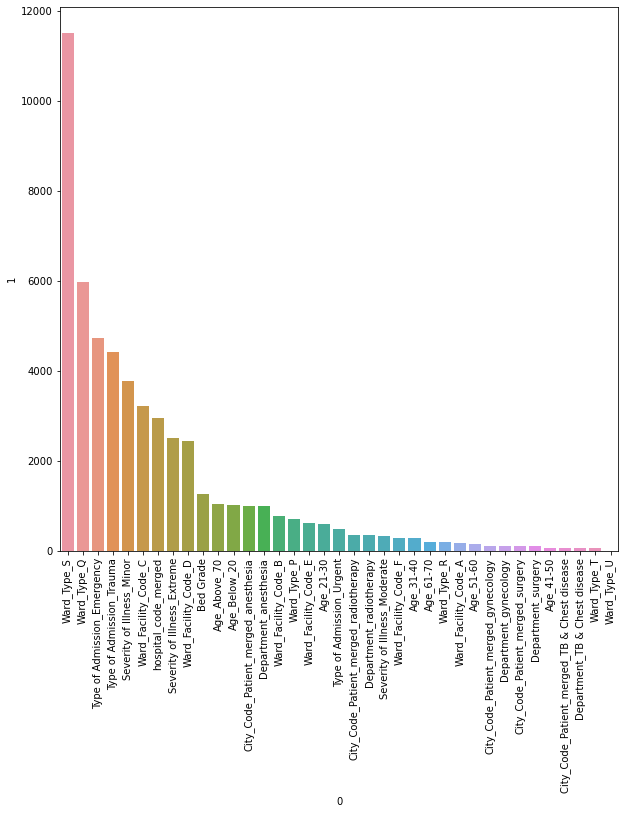

In [145]:
plot_df = pd.DataFrame(sorted_dict.items())
plt.figure(figsize=(10,10))
ax = sns.barplot(x=0, y=1, data=plot_df)
plt.xticks(rotation=90)
# plot the scores
# sns.barplot(x=sorted_dict.keys(), y=sorted_dict.values())
# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()

#### numeric cols feature selection

In [146]:
train_x_num = train_x[['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']]
test_x_num = test_x[['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']]
X_train_fs_num, X_test_fs_num, fs_num = select_features(train_x_num, train_y, test_x_num, f_classif)
# what are scores for the features
important_features_num = {}
for i in range(len(fs_num.scores_)):
#     print('Feature %s: \n %f' % (train_x_cat.columns[i], fs.scores_[i]))
    important_features_num[train_x_num.columns[i]] = fs_num.scores_[i]
sorted_dict_num = dict( sorted(important_features_num.items(),
                           key=lambda z: z[1],
                           reverse=True))
print(sorted_dict_num)

{'Visitors with Patient': 15972.980813781856, 'Available Extra Rooms in Hospital': 706.4474862061679, 'Admission_Deposit': 468.2240695134717}


(array([0, 1, 2]),
 [Text(0, 0, 'Visitors with Patient'),
  Text(1, 0, 'Available Extra Rooms in Hospital'),
  Text(2, 0, 'Admission_Deposit')])

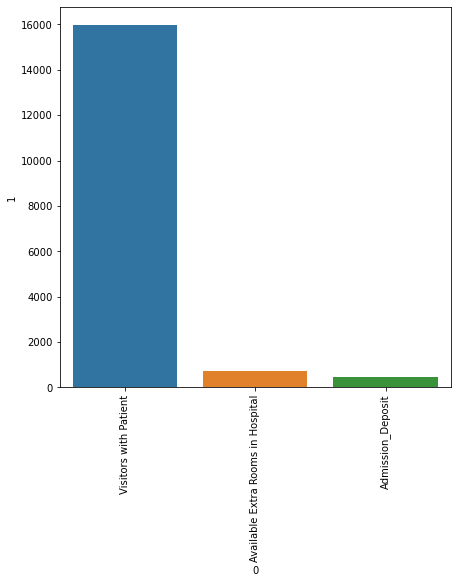

In [147]:
plot_df_num = pd.DataFrame(sorted_dict_num.items())
plt.figure(figsize=(7,7))
ax = sns.barplot(x=0, y=1, data=plot_df_num)
plt.xticks(rotation=90)


#### Label encoded cat cols feature selection                      

In [820]:
# test_x_le.drop(columns=['Stay'], inplace=True)

In [148]:
train_x_cat_le = train_x_le.drop(columns=['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit'])
test_x_cat_le = test_x_le.drop(columns=['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit'])

X_train_le_fs, X_test_le_fs, fs_le = select_features(train_x_cat_le, train_y_le, test_x_cat_le)
# what are scores for the features
important_features_le = {}
for i in range(len(fs_le.scores_)):
#     print('Feature %s: \n %f' % (train_x_cat.columns[i], fs.scores_[i]))
    important_features_le[train_x_cat_le.columns[i]] = fs_le.scores_[i]
sorted_dict_le = dict( sorted(important_features_le.items(),
                           key=lambda z: z[1],
                           reverse=True))
print(sorted_dict_le)

{'Ward_Type': 5792.833822842745, 'hospital_code_merged': 2949.504913139188, 'Type of Admission': 1945.4684998097894, 'Bed Grade': 1268.5052599516875, 'Age': 901.4529512595808, 'Ward_Facility_Code': 588.0981251761675, 'Severity of Illness': 179.56925952166858, 'City_Code_Patient_merged': 104.86765186436614, 'Department': 104.86765186436614}


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Ward_Type'),
  Text(1, 0, 'hospital_code_merged'),
  Text(2, 0, 'Type of Admission'),
  Text(3, 0, 'Bed Grade'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'Ward_Facility_Code'),
  Text(6, 0, 'Severity of Illness'),
  Text(7, 0, 'City_Code_Patient_merged'),
  Text(8, 0, 'Department')])

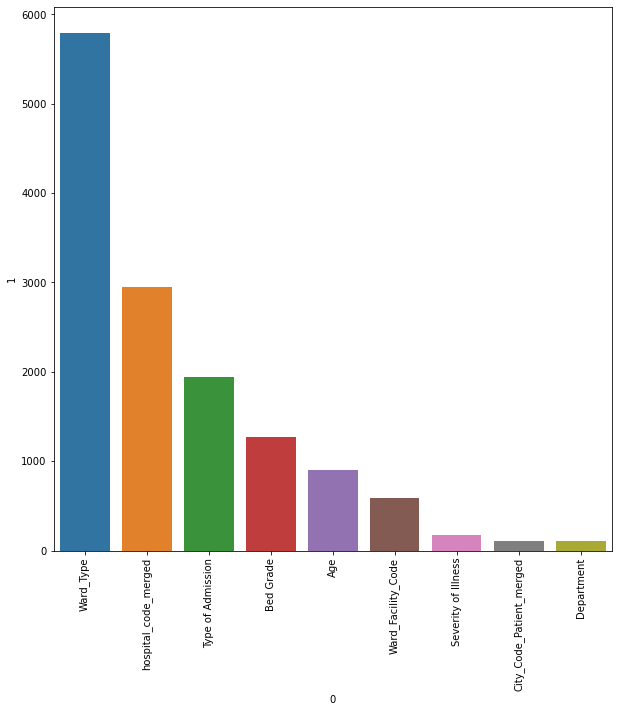

In [149]:
plot_df_le = pd.DataFrame(sorted_dict_le.items())
plt.figure(figsize=(10,10))
ax = sns.barplot(x=0, y=1, data=plot_df_le)
plt.xticks(rotation=90)

In [150]:
train_x_final_le_fs = train_x_le.drop(columns=['Department', 'City_Code_Patient_merged'])
train_y_final_le_fs = train_y_le.copy()
test_x_final_le_fs = test_x_le.drop(columns=['Department', 'City_Code_Patient_merged'])


In [ ]:
# train_x_final_one_hot_encode_fs = train_x.drop(columns=['Ward_Type_U', 'Ward_Type_T', ])
# train_y_final_one_hot_encode_fs = train_y.copy()
# test_x_final_one_hot_encode_fs = test_x.drop(columns=[])

In [ ]:
# train_x
# train_y
# test_x

In [151]:
df_basic = df.drop(columns=['case_id', 'patientid', 'Hospital_code', 'City_Code_Patient'])

In [152]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_type_code                 455495 non-null  object 
 1   City_Code_Hospital                 455495 non-null  int64  
 2   Hospital_region_code               455495 non-null  object 
 3   Available Extra Rooms in Hospital  455495 non-null  int64  
 4   Department                         455495 non-null  object 
 5   Ward_Type                          455495 non-null  object 
 6   Ward_Facility_Code                 455495 non-null  object 
 7   Bed Grade                          455495 non-null  float64
 8   Type of Admission                  455495 non-null  object 
 9   Severity of Illness                455495 non-null  object 
 10  Visitors with Patient              455495 non-null  int64  
 11  Age                                4554

In [153]:
df_basic_cat = df_basic.select_dtypes(include='object').drop(columns=['Stay', 'source'])

In [154]:
df_basic_cat = pd.get_dummies(df_basic_cat).reset_index(drop=True)

In [155]:
df_basic_num_cols = df_basic[['City_Code_Hospital','Bed Grade', 'Stay', 'source']].reset_index(drop=True)

In [156]:
df_basic_full = pd.concat([df_num_scaled, df_basic_num_cols, df_basic_cat], axis=1)

In [157]:
train_x_basic = df_basic_full[df_basic_full['source'] == 'train']
train_y_basic = train_x_basic.pop('Stay')
test_x_basic = df_basic_full[df_basic_full['source'] == 'test']
test_x_basic.drop(columns=['source', 'Stay'], inplace=True)
train_x_basic.drop(columns=['source'], inplace=True)

In [158]:
train_x_basic.head()

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,City_Code_Hospital,Bed Grade,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,...,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_Above_70,Age_Below_20
0,-0.168073,-0.726357,0.030937,3,2.0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-1.024977,-0.726357,0.992244,5,2.0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,-1.024977,-0.726357,-0.122061,1,2.0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,-1.024977,-0.726357,2.207012,2,2.0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,-1.024977,-0.726357,0.627261,2,2.0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [159]:
test_x_basic

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,City_Code_Hospital,Bed Grade,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,...,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_Above_70,Age_Below_20
318438,-0.168073,-0.726357,-1.642825,3,2.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
318439,-1.024977,0.404838,-0.792119,4,2.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
318440,-0.168073,-0.160759,-0.355245,2,4.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
318441,-0.168073,-0.160759,-0.649259,6,2.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
318442,-1.024977,0.404838,-0.660319,11,2.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455490,0.688830,0.404838,1.323126,2,3.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
455491,-1.024977,-0.726357,-1.260330,1,4.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
455492,-1.024977,-0.726357,2.131435,3,4.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
455493,-1.024977,-0.726357,0.513895,1,4.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Pandas Profiling

In [160]:
import pandas_profiling as pp

In [130]:
profile = pp.ProfileReport(df)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Modelling

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [162]:
def metrics_custom(actual_y,pred_y):
    print('Confusion Matrix:\n', confusion_matrix(actual_y, pred_y))
    print('\n\nAccuracy Score:\n', accuracy_score(actual_y, pred_y))
    print('\n\nClassification Report: \n', classification_report(actual_y, pred_y))

#### Logistic regression

In [833]:
lr = LogisticRegression()
lr.fit(train_x, train_y)
pred_y_train_lr = lr.predict(train_x)
pred_y_test_lr = lr.predict(test_x)
metrics_custom(train_y, pred_y_train_lr)




Confusion Matrix:
 [[  981 11241 10841   513     0    28     0     0     0     0     0]
 [  404 31226 39933  3936     0  2632     0     0     1     0     7]
 [  325 23548 59558  2689     0  1298     0     0     0     0    73]
 [  195  9602 23730 11041     0 10437     0     0     5     0   149]
 [  102  2315  7408   994     0   832     0     0     1     0    91]
 [   88  2806  5497  9825     0 16439     0     0     1     0   362]
 [   19   335  1488   360     0   482     0     0     1     0    59]
 [   37   622  1129  2902     0  4933     0     0     2     0   629]
 [   11   152   296   345     0  3622     0     0     1     0   411]
 [    8   124   327   704     0  1233     0     0     0     0   369]
 [   24   204   471   558     0  3054     0     0     5     0  2367]]


Accuracy Score:
 0.3819047977942331


Classification Report: 
                     precision    recall  f1-score   support

              0-10       0.45      0.04      0.08     23604
             11-20       0.38      

In [840]:
lr.fit(train_x_final_le_fs, train_y_final_le_fs)
pred_y_train_fs_lr = lr.predict(train_x_final_le_fs)
pred_y_test_fs_lr = lr.predict(test_x_final_le_fs)
metrics_custom(train_y_final_le_fs, pred_y_train_fs_lr)

Confusion Matrix:
 [[  360 10702 12225   263     0    54     0     0     0     0     0]
 [  128 29095 42359  3427     0  3129     0     0     0     0     1]
 [   72 23462 60581  1788     0  1529     0     0     0     0    59]
 [   51 10965 22272 10436     0 11306     0     0     0     0   129]
 [   34  3067  6830   840     0   887     0     0     0     0    85]
 [   33  3299  5290  9706     0 16370     0     0     0     0   320]
 [    7   592  1309   295     0   481     0     0     0     0    60]
 [   11   886  1081  3010     0  4613     0     0     0     0   653]
 [    1   213   262   392     0  3640     0     0     0     0   330]
 [    2   217   310   793     0  1073     0     0     0     0   370]
 [   13   388   357   571     0  3119     0     0     0     0  2235]]


Accuracy Score:
 0.37394092413593855


Classification Report: 
                     precision    recall  f1-score   support

              0-10       0.51      0.02      0.03     23604
             11-20       0.35     

In [863]:
lr = LogisticRegression()
lr.fit(train_x_basic, train_y_basic)
pred_y_train_basic_lr = lr.predict(train_x_basic)
pred_y_test_basic_lr = lr.predict(test_x_basic)
metrics_custom(train_y_basic, pred_y_train_basic_lr)

Confusion Matrix:
 [[  967 12003 10046   567     0    21     0     0     0     0     0]
 [  372 35085 35845  4321     0  2498     0     2     1     0    15]
 [  280 25212 57975  2689     0  1262     0     1     0     0    72]
 [  177 11038 22479 11689     0  9613     0     3     6     0   154]
 [  100  2635  7087  1034     0   789     0     0     1     0    97]
 [   78  3245  5295  9941     0 16095     0     2     0     0   362]
 [   20   404  1418   371     0   461     0     3     1     0    66]
 [   34   718  1076  3000     0  4779     0     0     3     0   644]
 [   13   180   265   409     0  3604     0     2     1     0   364]
 [    9   167   302   743     0  1178     0     0     1     0   365]
 [   21   286   421   563     0  3003     0     0     4     0  2385]]


Accuracy Score:
 0.390019407231549


Classification Report: 
                     precision    recall  f1-score   support

              0-10       0.47      0.04      0.08     23604
             11-20       0.39      0

#### KNN Classifier

In [864]:
def knn_model(trainX, trainY, testX, weights='distance', metric='manhattan', k_value=5):
    knn = KNeighborsClassifier(n_neighbors=k_value, weights=weights, metric=metric, n_jobs=-1)
    knn.fit(trainX, trainY)
    predict_trainY = knn.predict(trainX)
    predict_testY = knn.predict(testX)
    metrics_custom(trainY, predict_trainY)
    return predict_testY

In [867]:
pred_y_train_knn = knn_model(train_x, train_y, test_x, k_value=5)

KeyboardInterrupt: 

In [ ]:
pred_y_train_basic_knn = knn_model(train_x_basic, train_y_basic, test_x_basic, k_value=5)

In [ ]:
pred_y_train_le_fs_knn = knn_model(train_x_final_le_fs, train_y_final_le_fs, test_x_final_le_fs, k_value=5)

#### Naive Bayes

In [869]:
def NB(trainX, trainY, testX):
    nb = GaussianNB()
    nb.fit(trainX, trainY)
    predict_trainY = nb.predict(trainX)
    predict_testY = nb.predict(testX)
    metrics_custom(trainY, predict_trainY)
    return predict_testY

In [870]:
pred_y_train_basic_nb = NB(train_x, train_y, test_x)

Confusion Matrix:
 [[ 1252  1611   185     3  8368  8992   453   146   173    10  2411]
 [ 2744  7410  1350    12 26853 29383  1442   331   543    15  8056]
 [ 1783  5493  1843    10 36098 30144  2116   432   693    22  8857]
 [  584  2076   617     8 16085 26797  1391   528   591    20  6462]
 [  134   407   153     1  5356  3851   429   112   124     4  1172]
 [  113   483    99     0  4524 22247   917   964   528    25  5118]
 [   17    55    27     0  1009  1022   143    57    25     1   388]
 [   18   116    17     1  1182  6010   389   454   177     5  1885]
 [    5    17     6     0   236  2708   130   392   140    16  1188]
 [    2    12     3     0   312  1500   130   120    74     5   607]
 [   10    29     6     0   292  2314   189   606   188    38  3011]]


Accuracy Score:
 0.13148242358010037


Classification Report: 
                     precision    recall  f1-score   support

              0-10       0.19      0.05      0.08     23604
             11-20       0.42     

In [871]:
pred_y_train_basic_nb = NB(train_x_basic, train_y_basic, test_x_basic)

Confusion Matrix:
 [[ 1372  4201   242     0  8501  7279   492    16   216     3  1282]
 [ 2747 16364  1781     0 25722 25106  1484    50   737    13  4135]
 [ 1616 12049  2560     0 36245 27434  2304   102   946    27  4208]
 [  589  4501   698     0 17245 26012  1411   103   889    17  3694]
 [  109   889   156     0  5731  3551   427    24   183     2   671]
 [  140  1146   103     0  5668 21971   953   282  1018    21  3716]
 [   10   120    29     0  1104   974   161    14    52     0   280]
 [   23   226     9     0  1743  5730   437   124   409     4  1549]
 [    6    52    10     0   345  2591   115   180   312    12  1215]
 [    1    32     7     0   476  1426   126    30   129     1   537]
 [   10    46     4     0   448  2180   216   212   391    17  3159]]


Accuracy Score:
 0.16252771340103883


Classification Report: 
                     precision    recall  f1-score   support

              0-10       0.21      0.06      0.09     23604
             11-20       0.41     

In [872]:
pred_y_train_le_fs_nb = NB(train_x_final_le_fs, train_y_final_le_fs, test_x_final_le_fs)

Confusion Matrix:
 [[  391 10656 12020   384    84    64     0     0     0     0     5]
 [  205 30817 41075  2587   296  3070    21    16     7     0    45]
 [  155 24430 59306  1503   504  1336    11    19     6     0   221]
 [  109 13114 22762  7926   250 10506    70    77    38     0   307]
 [   52  3178  6820   624    96   829     9     6    13     0   116]
 [   55  4944  6875  7558   133 14327    56   156    62     0   852]
 [   14   605  1322   256    12   414     6     9    10     0    96]
 [   21  1376  1572  2243    33  4018    26    71   109     0   785]
 [    8   254   272   359    13  3155    13    89    30     0   645]
 [    3   319   435   577    11  1001     5     4    12     0   398]
 [   13   415   446   462    22  2663    21   104   115     1  2421]]


Accuracy Score:
 0.36236567243859086


Classification Report: 
                     precision    recall  f1-score   support

              0-10       0.38      0.02      0.03     23604
             11-20       0.34     

#### Decision_Tree

In [873]:
from sklearn.tree import DecisionTreeClassifier

In [891]:
def DT(trainX, trainY, testX):
    dt = DecisionTreeClassifier(min_samples_leaf=3, random_state=101)
    dt.fit(trainX, trainY)
    df_y_train = dt.predict(trainX)
    dt_y_test = dt.predict(testX)
    metrics_custom(trainY, df_y_train)
    return dt_y_test
# WIth min_sample_leaf=1, the model was overfitting: accuracy ~=0.998

In [892]:
pred_y_train_basic_dt = DT(train_x, train_y, test_x)

Confusion Matrix:
 [[16408  3077  2787   975   163   154    15    15     1     1     8]
 [ 4668 61518  7313  2942   382   992    29   199    46    19    31]
 [ 4516 12633 65860  3070   443   662    39   109    63    17    79]
 [ 2911  8350  7306 33219   337  2275    28   473   101    68    91]
 [ 1247  3062  2769  1366  2765   362    19    67    31    14    41]
 [ 1129  3352  2496  4112   306 22417    25   577   274    85   245]
 [  287   650   670   423    91   208   280    60    22    12    41]
 [  307  1187   732  1833   137  1705    29  3991   108    50   175]
 [   87   322   303   535    64   837    28   181  2283    14   184]
 [   89   349   196   576    82   512    11   188    40   623    99]
 [  130   418   332   600    83   788    33   318   246    61  3674]]


Accuracy Score:
 0.6690093518989568


Classification Report: 
                     precision    recall  f1-score   support

              0-10       0.52      0.70      0.59     23604
             11-20       0.65      

In [893]:
pred_y_train_basic_dt = DT(train_x_basic, train_y_basic, test_x_basic)

Confusion Matrix:
 [[16851  2866  2553   951   175   156    12    21     7     5     7]
 [ 4453 62504  6558  2935   395   962    30   208    34    20    40]
 [ 4114 11356 67518  3073   496   631    35   121    70    16    61]
 [ 2742  7696  6606 34763   405  2162    33   478   100    58   116]
 [ 1156  2807  2762  1375  3081   352    15    80    34    30    51]
 [ 1064  3158  2378  3788   320 23075    28   584   272    95   256]
 [  244   670   675   431    87   208   307    47    28     7    40]
 [  323  1099   670  1679   160  1509    34  4452    95    62   171]
 [   96   325   291   519    68   699    22   173  2449    16   180]
 [   81   349   189   527    71   519    14   195    39   702    79]
 [  132   401   315   571    84   716    27   292   222    67  3856]]


Accuracy Score:
 0.6894842952160232


Classification Report: 
                     precision    recall  f1-score   support

              0-10       0.54      0.71      0.61     23604
             11-20       0.67      

In [894]:
pred_y_train_le_fs_dt = DT(train_x_final_le_fs, train_y_final_le_fs, test_x_final_le_fs)

Confusion Matrix:
 [[16522  3007  2703   983   170   166    17    21     4     5     6]
 [ 4573 61558  7163  3133   391   984    33   202    35    32    35]
 [ 4330 11882 66808  2997   462   664    53   115    97    20    63]
 [ 2789  7847  7225 34009   348  2149    29   461   114    66   122]
 [ 1256  2896  2851  1358  2804   374    17    81    36    23    47]
 [ 1145  3302  2437  4075   296 22483    26   640   299    92   223]
 [  251   655   656   430    80   241   319    42    16    10    44]
 [  317  1114   684  1803   144  1580    33  4213   108    65   193]
 [  101   331   282   532    62   767    29   166  2384    19   165]
 [   73   349   208   544    69   530    15   187    35   681    74]
 [  137   423   346   585    63   786    34   281   277    75  3676]]


Accuracy Score:
 0.6766058070958868


Classification Report: 
                     precision    recall  f1-score   support

              0-10       0.52      0.70      0.60     23604
             11-20       0.66      

#### RandomForest

In [907]:
def RF(x_train, y_train, x_val):
    NoofEstimator = [50, 100, 150]
    MinSampleLeaf = [3, 5]
    MaxFeature = [0.5, 0.8, 1.0]
    best_score= []
    for i in NoofEstimator:
        for j in MinSampleLeaf:
            for k in MaxFeature:
                result = [i, j, k]
                rfc = RandomForestClassifier(n_estimators = i,
                                             min_samples_leaf = j,
                                             max_features = k, oob_score=True,
                                             random_state = 100)
                rfc.fit(x_train, y_train)
                result.append(rfc.score(x_train, y_train))
                if len(best_score) == 0:
                    best_score = result
                elif best_score[3] < result[3]:
                    best_score = result
                    print(best_score)
                print("oob score is : {}".format(rfc.oob_score_))
    print('The final best result is:', best_score)
#                 print(best_score)

In [908]:
pred_y_train_basic_rf = RF(train_x, train_y, test_x)

oob score is : 0.3631695965933714
[50, 3, 0.8, 0.7617306979694635]
oob score is : 0.3605034575019313
oob score is : 0.3755393514593108
oob score is : 0.37066870159968346
oob score is : 0.3668751844943129
[100, 3, 0.8, 0.767794672746343]
oob score is : 0.3637819606956456
oob score is : 0.37927948297627795
oob score is : 0.37433346522713995
oob score is : 0.36791149297508463
[150, 3, 0.8, 0.7698515880642386]
oob score is : 0.36527047651348143
oob score is : 0.38028752849848324
oob score is : 0.3757214905256282
The final best result is: [150, 3, 0.8, 0.7698515880642386]


In [910]:
pred_y_train_basic_rf = RF(train_x_basic, train_y_basic, test_x_basic)

oob score is : 0.38566063095484837
[50, 3, 0.8, 0.799361257136397]
oob score is : 0.3805858597277963
oob score is : 0.3962089951576131
oob score is : 0.391118522286913
oob score is : 0.39078250711284457
[100, 3, 0.8, 0.8055225821038946]
oob score is : 0.3855036145183678
oob score is : 0.4004107549978332
oob score is : 0.39572852486198257
oob score is : 0.39267298500807063
[150, 3, 0.8, 0.807871547993644]
oob score is : 0.3876013541097482
oob score is : 0.4013622746029054
oob score is : 0.39672400906926936
The final best result is: [150, 3, 0.8, 0.807871547993644]


In [913]:
pred_y_train_le_fs_rf = RF(train_x_final_le_fs, train_y_final_le_fs, test_x_final_le_fs)

oob score is : 0.3776841959816354
[50, 3, 0.8, 0.7694998712465221]
oob score is : 0.3717835182986955
oob score is : 0.3895546385795665
oob score is : 0.38419723776684944
oob score is : 0.38200528831358066
[100, 3, 0.8, 0.7750613934266639]
oob score is : 0.3763432756140913
oob score is : 0.3922396196433843
oob score is : 0.38792166764016855
oob score is : 0.38329596342145095
[150, 3, 0.8, 0.7773381317556322]
oob score is : 0.3775523021749917
oob score is : 0.3939102745275375
oob score is : 0.38919036044693156
The final best result is: [150, 3, 0.8, 0.7773381317556322]


#### GridSearchCV

In [175]:
def GridSearch(x_train, y_train, x_test):
    NoofEstimator = [150]
    MinSampleLeaf = [3]
    MaxFeature = [0.8]
    rf = RandomForestClassifier()
    rf_grid = GridSearchCV(estimator = rf, param_grid = dict(n_estimators = NoofEstimator,
                                         min_samples_leaf = MinSampleLeaf,
                                         max_features = MaxFeature, random_state=[100]))

    rf_grid.fit(x_train, y_train)
#     print(rf_grid.best_estimator_)
#     print(rf_grid.score(x_train, y_train))
    pred_y_test_grid_ = rf_grid.predict(x_test)
    return pred_y_test_grid_

In [148]:
pred_y_train_gs = GridSearch(train_x, train_y, test_x)

RandomForestClassifier(max_features=1.0, min_samples_leaf=3, n_estimators=150)
0.8051865669298263


In [149]:
pred_y_train_basic_gs = GridSearch(train_x_basic, train_y_basic, test_x_basic)

RandomForestClassifier(max_features=1.0, min_samples_leaf=3, n_estimators=150)
0.821657591116638


In [150]:
pred_y_train_le_fs_gs = GridSearch(train_x_final_le_fs, train_y_final_le_fs, test_x_final_le_fs)

RandomForestClassifier(max_features=1.0, min_samples_leaf=3, n_estimators=150)
0.7941545921027013


In [164]:
pred_y_final_submission = GridSearch(train_x_basic, train_y_basic, test_x_basic)

In [ ]:
pred_y_final_submission_2 = GridSearch(train_x_basic, train_y_basic, test_x_basic)

#### SVM

In [101]:
from sklearn.svm import SVC

In [102]:
def svm(x_train, y_train, x_test):
    kernalList = ['linear']
    degree_list = [2,5,8]
    c_list = [2,5,8]
#     for kernels in kernalList:
#         for degree in degree_list:
#             for c_value in c_list:
    svc = SVC()
    svc.fit(x_train, y_train)
    y_pred_train = svc.predict(x_train)
    y_pred_test = svc.predict(x_test)
    metrics_customs(y_train, y_pred_train)
    return y_pred_train

In [155]:
def gamma_selection():
    for gamma in [0.1, 1, 10, 100]:
        svc = SVC(kernel=Kernel,gamma=i, degree=Degree, C=c)
        svc.fit(x_train, y_train)
        y_pred_train = svc.predict(x_test)
        y_pred_test = svc.predict(x_train)
        print(accuracy_score(y_train, y_pred_train))

In [ ]:
pred_y_train_svm = svm(train_x, train_y, test_x)

In [ ]:
pred_y_train_basic_svm = svm(train_x_basic, train_y_basic, test_x_basic)

In [ ]:
pred_y_train_le_fs_svm = svm(train_x_final_le_fs, train_y_final_le_fs, test_x_final_le_fs)

#### Grid SearchCV?

#### CatBoost

In [136]:
from catboost import CatBoostClassifier, Pool, cv


In [960]:
df_skeleton = df.copy()

In [961]:
df_skeleton.drop(columns=['case_id'], inplace=True)

In [962]:
df_skeleton['City_Code_Patient'] = df_skeleton['City_Code_Patient'].astype('int64')              

In [963]:
df_skeleton.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      455495 non-null  int64  
 1   Hospital_type_code                 455495 non-null  object 
 2   City_Code_Hospital                 455495 non-null  int64  
 3   Hospital_region_code               455495 non-null  object 
 4   Available Extra Rooms in Hospital  455495 non-null  int64  
 5   Department                         455495 non-null  object 
 6   Ward_Type                          455495 non-null  object 
 7   Ward_Facility_Code                 455495 non-null  object 
 8   Bed Grade                          455495 non-null  float64
 9   patientid                          455495 non-null  int64  
 10  City_Code_Patient                  455495 non-null  int64  
 11  Type of Admission                  4554

In [964]:
cat_cols = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'patientid', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Age']
cat_cols_indices = []
for column in cat_cols:
    cat_cols_indices.append(df_skeleton.columns.get_loc(column))
print(cat_cols_indices)


[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 14]


In [965]:
X = df_skeleton[df_skeleton['source']=='train']
Y = X.pop('Stay')
VAL = df_skeleton[df_skeleton['source']=='test']
X.drop(columns=['source'], inplace=True)
VAL.drop(columns=['source', 'Stay'], inplace=True)

In [966]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318438 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  318438 non-null  int64  
 11  Type of Admission                  3184

In [137]:

def CAT(X_train, y_train, x_test):
    cat_model = CatBoostClassifier()
    cat_model.fit(X_train, y_train)

    
#     cv_params = cat_model.get_params()
    
#     cat_model.fit(X_train, y_train, cat_features=cat_cols_indices)
        
#     cv_data = cv(Pool(X, y, cat_features=cat_cols_indices),cv_params)
        
#     print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
#     np.max(cv_data['test-Accuracy-mean']),
#     cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
#     np.argmax(cv_data['test-Accuracy-mean'])))
        
    pred_y_train_cat = cat_model.predict(X_train)
    pred_y_test_cat = cat_model.predict(x_test)
    metrics_custom(y_train, pred_y_train_cat)
    return pred_y_train_cat


    

In [138]:
# pred_y_train_cat1 =  CAT(X, Y, VAL)
pred_y_train_basic_catboost = CAT(train_x_basic, train_y_basic, test_x_basic)

Learning rate set to 0.106164
0:	learn: 2.2208383	total: 930ms	remaining: 15m 28s
1:	learn: 2.1045273	total: 1.64s	remaining: 13m 39s
2:	learn: 2.0164476	total: 2.38s	remaining: 13m 10s
3:	learn: 1.9462731	total: 3.1s	remaining: 12m 51s
4:	learn: 1.8899794	total: 3.81s	remaining: 12m 38s
5:	learn: 1.8456927	total: 4.54s	remaining: 12m 32s
6:	learn: 1.8078856	total: 5.35s	remaining: 12m 38s
7:	learn: 1.7782229	total: 6.09s	remaining: 12m 35s
8:	learn: 1.7502214	total: 6.8s	remaining: 12m 29s
9:	learn: 1.7256241	total: 7.53s	remaining: 12m 25s
10:	learn: 1.7069477	total: 8.25s	remaining: 12m 21s
11:	learn: 1.6908387	total: 8.97s	remaining: 12m 18s
12:	learn: 1.6748466	total: 9.69s	remaining: 12m 15s
13:	learn: 1.6604192	total: 10.4s	remaining: 12m 13s
14:	learn: 1.6480613	total: 11.1s	remaining: 12m 10s
15:	learn: 1.6380092	total: 11.9s	remaining: 12m 8s
16:	learn: 1.6293204	total: 12.6s	remaining: 12m 7s
17:	learn: 1.6218109	total: 13.3s	remaining: 12m 5s
18:	learn: 1.6152908	total: 14s

153:	learn: 1.5141995	total: 1m 56s	remaining: 10m 41s
154:	learn: 1.5138095	total: 1m 57s	remaining: 10m 40s
155:	learn: 1.5136024	total: 1m 58s	remaining: 10m 40s
156:	learn: 1.5133968	total: 1m 59s	remaining: 10m 39s
157:	learn: 1.5130946	total: 1m 59s	remaining: 10m 38s
158:	learn: 1.5129788	total: 2m	remaining: 10m 38s
159:	learn: 1.5128384	total: 2m 1s	remaining: 10m 37s
160:	learn: 1.5126012	total: 2m 2s	remaining: 10m 37s
161:	learn: 1.5124934	total: 2m 3s	remaining: 10m 37s
162:	learn: 1.5123823	total: 2m 4s	remaining: 10m 37s
163:	learn: 1.5122267	total: 2m 5s	remaining: 10m 37s
164:	learn: 1.5119751	total: 2m 5s	remaining: 10m 37s
165:	learn: 1.5117213	total: 2m 6s	remaining: 10m 36s
166:	learn: 1.5114450	total: 2m 7s	remaining: 10m 36s
167:	learn: 1.5113009	total: 2m 8s	remaining: 10m 37s
168:	learn: 1.5111182	total: 2m 9s	remaining: 10m 37s
169:	learn: 1.5110139	total: 2m 10s	remaining: 10m 37s
170:	learn: 1.5106383	total: 2m 11s	remaining: 10m 37s
171:	learn: 1.5104582	to

305:	learn: 1.4933654	total: 4m 6s	remaining: 9m 17s
306:	learn: 1.4932276	total: 4m 6s	remaining: 9m 17s
307:	learn: 1.4931175	total: 4m 7s	remaining: 9m 16s
308:	learn: 1.4930077	total: 4m 8s	remaining: 9m 15s
309:	learn: 1.4928533	total: 4m 9s	remaining: 9m 14s
310:	learn: 1.4927755	total: 4m 9s	remaining: 9m 13s
311:	learn: 1.4926909	total: 4m 10s	remaining: 9m 13s
312:	learn: 1.4926011	total: 4m 11s	remaining: 9m 12s
313:	learn: 1.4925253	total: 4m 12s	remaining: 9m 11s
314:	learn: 1.4924288	total: 4m 13s	remaining: 9m 10s
315:	learn: 1.4922725	total: 4m 13s	remaining: 9m 9s
316:	learn: 1.4921740	total: 4m 14s	remaining: 9m 9s
317:	learn: 1.4920612	total: 4m 15s	remaining: 9m 8s
318:	learn: 1.4918446	total: 4m 16s	remaining: 9m 8s
319:	learn: 1.4917103	total: 4m 17s	remaining: 9m 7s
320:	learn: 1.4915824	total: 4m 18s	remaining: 9m 6s
321:	learn: 1.4914961	total: 4m 19s	remaining: 9m 6s
322:	learn: 1.4913962	total: 4m 20s	remaining: 9m 5s
323:	learn: 1.4912872	total: 4m 21s	remain

459:	learn: 1.4789056	total: 6m 11s	remaining: 7m 15s
460:	learn: 1.4788124	total: 6m 11s	remaining: 7m 14s
461:	learn: 1.4786902	total: 6m 12s	remaining: 7m 14s
462:	learn: 1.4786419	total: 6m 13s	remaining: 7m 13s
463:	learn: 1.4784992	total: 6m 14s	remaining: 7m 12s
464:	learn: 1.4784126	total: 6m 15s	remaining: 7m 11s
465:	learn: 1.4783000	total: 6m 15s	remaining: 7m 10s
466:	learn: 1.4781813	total: 6m 16s	remaining: 7m 9s
467:	learn: 1.4780869	total: 6m 17s	remaining: 7m 9s
468:	learn: 1.4780050	total: 6m 18s	remaining: 7m 8s
469:	learn: 1.4778992	total: 6m 19s	remaining: 7m 7s
470:	learn: 1.4778064	total: 6m 19s	remaining: 7m 6s
471:	learn: 1.4777624	total: 6m 20s	remaining: 7m 5s
472:	learn: 1.4776802	total: 6m 21s	remaining: 7m 5s
473:	learn: 1.4775713	total: 6m 22s	remaining: 7m 4s
474:	learn: 1.4774257	total: 6m 23s	remaining: 7m 3s
475:	learn: 1.4773550	total: 6m 23s	remaining: 7m 2s
476:	learn: 1.4772449	total: 6m 24s	remaining: 7m 1s
477:	learn: 1.4771752	total: 6m 25s	rem

612:	learn: 1.4656344	total: 8m 15s	remaining: 5m 12s
613:	learn: 1.4655542	total: 8m 16s	remaining: 5m 11s
614:	learn: 1.4654357	total: 8m 16s	remaining: 5m 11s
615:	learn: 1.4653688	total: 8m 17s	remaining: 5m 10s
616:	learn: 1.4652486	total: 8m 18s	remaining: 5m 9s
617:	learn: 1.4651689	total: 8m 19s	remaining: 5m 8s
618:	learn: 1.4651054	total: 8m 20s	remaining: 5m 7s
619:	learn: 1.4650460	total: 8m 20s	remaining: 5m 7s
620:	learn: 1.4649344	total: 8m 21s	remaining: 5m 6s
621:	learn: 1.4648431	total: 8m 22s	remaining: 5m 5s
622:	learn: 1.4647657	total: 8m 23s	remaining: 5m 4s
623:	learn: 1.4646712	total: 8m 24s	remaining: 5m 3s
624:	learn: 1.4645819	total: 8m 24s	remaining: 5m 2s
625:	learn: 1.4645030	total: 8m 25s	remaining: 5m 2s
626:	learn: 1.4644058	total: 8m 26s	remaining: 5m 1s
627:	learn: 1.4643151	total: 8m 27s	remaining: 5m
628:	learn: 1.4642068	total: 8m 28s	remaining: 4m 59s
629:	learn: 1.4641583	total: 8m 28s	remaining: 4m 58s
630:	learn: 1.4640636	total: 8m 29s	remaini

765:	learn: 1.4545250	total: 10m 18s	remaining: 3m 9s
766:	learn: 1.4544643	total: 10m 19s	remaining: 3m 8s
767:	learn: 1.4543875	total: 10m 20s	remaining: 3m 7s
768:	learn: 1.4543260	total: 10m 21s	remaining: 3m 6s
769:	learn: 1.4542307	total: 10m 22s	remaining: 3m 5s
770:	learn: 1.4541541	total: 10m 22s	remaining: 3m 5s
771:	learn: 1.4541055	total: 10m 23s	remaining: 3m 4s
772:	learn: 1.4540086	total: 10m 24s	remaining: 3m 3s
773:	learn: 1.4539375	total: 10m 25s	remaining: 3m 2s
774:	learn: 1.4538248	total: 10m 26s	remaining: 3m 1s
775:	learn: 1.4537557	total: 10m 26s	remaining: 3m
776:	learn: 1.4536688	total: 10m 27s	remaining: 3m
777:	learn: 1.4535842	total: 10m 28s	remaining: 2m 59s
778:	learn: 1.4535270	total: 10m 29s	remaining: 2m 58s
779:	learn: 1.4534438	total: 10m 30s	remaining: 2m 57s
780:	learn: 1.4533443	total: 10m 30s	remaining: 2m 56s
781:	learn: 1.4532686	total: 10m 31s	remaining: 2m 56s
782:	learn: 1.4532383	total: 10m 32s	remaining: 2m 55s
783:	learn: 1.4531492	total:

916:	learn: 1.4444192	total: 12m 22s	remaining: 1m 7s
917:	learn: 1.4443434	total: 12m 23s	remaining: 1m 6s
918:	learn: 1.4442743	total: 12m 24s	remaining: 1m 5s
919:	learn: 1.4442174	total: 12m 25s	remaining: 1m 4s
920:	learn: 1.4441704	total: 12m 25s	remaining: 1m 3s
921:	learn: 1.4440913	total: 12m 26s	remaining: 1m 3s
922:	learn: 1.4440088	total: 12m 27s	remaining: 1m 2s
923:	learn: 1.4439723	total: 12m 28s	remaining: 1m 1s
924:	learn: 1.4439267	total: 12m 29s	remaining: 1m
925:	learn: 1.4438722	total: 12m 30s	remaining: 60s
926:	learn: 1.4438035	total: 12m 31s	remaining: 59.2s
927:	learn: 1.4437424	total: 12m 32s	remaining: 58.4s
928:	learn: 1.4436732	total: 12m 32s	remaining: 57.5s
929:	learn: 1.4436277	total: 12m 33s	remaining: 56.7s
930:	learn: 1.4435683	total: 12m 34s	remaining: 55.9s
931:	learn: 1.4434896	total: 12m 35s	remaining: 55.1s
932:	learn: 1.4434331	total: 12m 36s	remaining: 54.3s
933:	learn: 1.4433660	total: 12m 36s	remaining: 53.5s
934:	learn: 1.4433169	total: 12m 

In [139]:
pred_y_train_catboost = CAT(train_x, train_y, test_x)

Learning rate set to 0.106164
0:	learn: 2.2166014	total: 721ms	remaining: 12m
1:	learn: 2.0974798	total: 1.46s	remaining: 12m 7s
2:	learn: 2.0109334	total: 2.19s	remaining: 12m 8s
3:	learn: 1.9439277	total: 2.94s	remaining: 12m 12s
4:	learn: 1.8903156	total: 3.69s	remaining: 12m 15s
5:	learn: 1.8445861	total: 4.42s	remaining: 12m 13s
6:	learn: 1.8066976	total: 5.16s	remaining: 12m 12s
7:	learn: 1.7755061	total: 5.89s	remaining: 12m 10s
8:	learn: 1.7498951	total: 6.63s	remaining: 12m 10s
9:	learn: 1.7286695	total: 7.37s	remaining: 12m 9s
10:	learn: 1.7096639	total: 8.11s	remaining: 12m 8s
11:	learn: 1.6922164	total: 8.86s	remaining: 12m 9s
12:	learn: 1.6771031	total: 9.61s	remaining: 12m 9s
13:	learn: 1.6638591	total: 10.4s	remaining: 12m 9s
14:	learn: 1.6527198	total: 11.1s	remaining: 12m 8s
15:	learn: 1.6425708	total: 11.9s	remaining: 12m 8s
16:	learn: 1.6346131	total: 12.6s	remaining: 12m 8s
17:	learn: 1.6269972	total: 13.3s	remaining: 12m 8s
18:	learn: 1.6207139	total: 14.1s	remaini

154:	learn: 1.5212591	total: 2m 1s	remaining: 11m 4s
155:	learn: 1.5210762	total: 2m 2s	remaining: 11m 3s
156:	learn: 1.5208446	total: 2m 3s	remaining: 11m 2s
157:	learn: 1.5207181	total: 2m 4s	remaining: 11m 2s
158:	learn: 1.5205596	total: 2m 5s	remaining: 11m 1s
159:	learn: 1.5204656	total: 2m 5s	remaining: 11m
160:	learn: 1.5202024	total: 2m 6s	remaining: 10m 59s
161:	learn: 1.5199793	total: 2m 7s	remaining: 10m 58s
162:	learn: 1.5197857	total: 2m 8s	remaining: 10m 58s
163:	learn: 1.5196894	total: 2m 8s	remaining: 10m 57s
164:	learn: 1.5194936	total: 2m 9s	remaining: 10m 56s
165:	learn: 1.5193500	total: 2m 10s	remaining: 10m 55s
166:	learn: 1.5191454	total: 2m 11s	remaining: 10m 54s
167:	learn: 1.5189969	total: 2m 12s	remaining: 10m 54s
168:	learn: 1.5188692	total: 2m 12s	remaining: 10m 53s
169:	learn: 1.5188113	total: 2m 13s	remaining: 10m 52s
170:	learn: 1.5186140	total: 2m 14s	remaining: 10m 51s
171:	learn: 1.5185412	total: 2m 15s	remaining: 10m 50s
172:	learn: 1.5183676	total: 2

306:	learn: 1.5017508	total: 4m 3s	remaining: 9m 10s
307:	learn: 1.5016521	total: 4m 4s	remaining: 9m 9s
308:	learn: 1.5015747	total: 4m 5s	remaining: 9m 8s
309:	learn: 1.5015319	total: 4m 6s	remaining: 9m 7s
310:	learn: 1.5014451	total: 4m 6s	remaining: 9m 6s
311:	learn: 1.5013202	total: 4m 7s	remaining: 9m 5s
312:	learn: 1.5012499	total: 4m 8s	remaining: 9m 5s
313:	learn: 1.5011439	total: 4m 9s	remaining: 9m 4s
314:	learn: 1.5010187	total: 4m 9s	remaining: 9m 3s
315:	learn: 1.5008646	total: 4m 10s	remaining: 9m 2s
316:	learn: 1.5007993	total: 4m 11s	remaining: 9m 1s
317:	learn: 1.5007229	total: 4m 12s	remaining: 9m 1s
318:	learn: 1.5006070	total: 4m 13s	remaining: 9m
319:	learn: 1.5005245	total: 4m 13s	remaining: 8m 59s
320:	learn: 1.5004289	total: 4m 14s	remaining: 8m 58s
321:	learn: 1.5003566	total: 4m 15s	remaining: 8m 57s
322:	learn: 1.5002970	total: 4m 16s	remaining: 8m 57s
323:	learn: 1.5002448	total: 4m 17s	remaining: 8m 56s
324:	learn: 1.5001117	total: 4m 18s	remaining: 8m 55

459:	learn: 1.4882237	total: 6m 5s	remaining: 7m 9s
460:	learn: 1.4881770	total: 6m 6s	remaining: 7m 8s
461:	learn: 1.4880564	total: 6m 7s	remaining: 7m 7s
462:	learn: 1.4879860	total: 6m 7s	remaining: 7m 6s
463:	learn: 1.4878705	total: 6m 8s	remaining: 7m 5s
464:	learn: 1.4877745	total: 6m 9s	remaining: 7m 5s
465:	learn: 1.4877071	total: 6m 10s	remaining: 7m 4s
466:	learn: 1.4876145	total: 6m 11s	remaining: 7m 3s
467:	learn: 1.4875775	total: 6m 11s	remaining: 7m 2s
468:	learn: 1.4874971	total: 6m 12s	remaining: 7m 1s
469:	learn: 1.4874353	total: 6m 13s	remaining: 7m 1s
470:	learn: 1.4873685	total: 6m 14s	remaining: 7m
471:	learn: 1.4872881	total: 6m 15s	remaining: 6m 59s
472:	learn: 1.4872319	total: 6m 15s	remaining: 6m 58s
473:	learn: 1.4871815	total: 6m 16s	remaining: 6m 57s
474:	learn: 1.4871199	total: 6m 17s	remaining: 6m 57s
475:	learn: 1.4870630	total: 6m 18s	remaining: 6m 56s
476:	learn: 1.4869726	total: 6m 18s	remaining: 6m 55s
477:	learn: 1.4869058	total: 6m 19s	remaining: 6m

612:	learn: 1.4773019	total: 8m 7s	remaining: 5m 7s
613:	learn: 1.4772439	total: 8m 7s	remaining: 5m 6s
614:	learn: 1.4771929	total: 8m 8s	remaining: 5m 5s
615:	learn: 1.4771116	total: 8m 9s	remaining: 5m 5s
616:	learn: 1.4770775	total: 8m 10s	remaining: 5m 4s
617:	learn: 1.4770257	total: 8m 11s	remaining: 5m 3s
618:	learn: 1.4769943	total: 8m 11s	remaining: 5m 2s
619:	learn: 1.4769331	total: 8m 12s	remaining: 5m 1s
620:	learn: 1.4768499	total: 8m 13s	remaining: 5m 1s
621:	learn: 1.4768045	total: 8m 14s	remaining: 5m
622:	learn: 1.4767281	total: 8m 15s	remaining: 4m 59s
623:	learn: 1.4766608	total: 8m 15s	remaining: 4m 58s
624:	learn: 1.4766038	total: 8m 16s	remaining: 4m 57s
625:	learn: 1.4765541	total: 8m 17s	remaining: 4m 57s
626:	learn: 1.4764771	total: 8m 18s	remaining: 4m 56s
627:	learn: 1.4764305	total: 8m 18s	remaining: 4m 55s
628:	learn: 1.4763526	total: 8m 19s	remaining: 4m 54s
629:	learn: 1.4763028	total: 8m 20s	remaining: 4m 53s
630:	learn: 1.4762062	total: 8m 21s	remaining

765:	learn: 1.4675632	total: 10m 8s	remaining: 3m 5s
766:	learn: 1.4675100	total: 10m 9s	remaining: 3m 5s
767:	learn: 1.4674529	total: 10m 10s	remaining: 3m 4s
768:	learn: 1.4673827	total: 10m 11s	remaining: 3m 3s
769:	learn: 1.4673276	total: 10m 11s	remaining: 3m 2s
770:	learn: 1.4672734	total: 10m 12s	remaining: 3m 2s
771:	learn: 1.4671850	total: 10m 13s	remaining: 3m 1s
772:	learn: 1.4671367	total: 10m 14s	remaining: 3m
773:	learn: 1.4670651	total: 10m 15s	remaining: 2m 59s
774:	learn: 1.4670398	total: 10m 16s	remaining: 2m 58s
775:	learn: 1.4670002	total: 10m 17s	remaining: 2m 58s
776:	learn: 1.4669514	total: 10m 17s	remaining: 2m 57s
777:	learn: 1.4668669	total: 10m 18s	remaining: 2m 56s
778:	learn: 1.4668186	total: 10m 19s	remaining: 2m 55s
779:	learn: 1.4667523	total: 10m 20s	remaining: 2m 54s
780:	learn: 1.4666515	total: 10m 21s	remaining: 2m 54s
781:	learn: 1.4665839	total: 10m 21s	remaining: 2m 53s
782:	learn: 1.4665066	total: 10m 22s	remaining: 2m 52s
783:	learn: 1.4664334	t

916:	learn: 1.4587299	total: 12m 11s	remaining: 1m 6s
917:	learn: 1.4586713	total: 12m 12s	remaining: 1m 5s
918:	learn: 1.4586099	total: 12m 13s	remaining: 1m 4s
919:	learn: 1.4585424	total: 12m 14s	remaining: 1m 3s
920:	learn: 1.4584613	total: 12m 15s	remaining: 1m 3s
921:	learn: 1.4584295	total: 12m 15s	remaining: 1m 2s
922:	learn: 1.4583503	total: 12m 16s	remaining: 1m 1s
923:	learn: 1.4583160	total: 12m 17s	remaining: 1m
924:	learn: 1.4582910	total: 12m 18s	remaining: 59.9s
925:	learn: 1.4582417	total: 12m 19s	remaining: 59.1s
926:	learn: 1.4581796	total: 12m 19s	remaining: 58.3s
927:	learn: 1.4581179	total: 12m 20s	remaining: 57.5s
928:	learn: 1.4580272	total: 12m 21s	remaining: 56.7s
929:	learn: 1.4579467	total: 12m 22s	remaining: 55.9s
930:	learn: 1.4579183	total: 12m 23s	remaining: 55.1s
931:	learn: 1.4578475	total: 12m 23s	remaining: 54.3s
932:	learn: 1.4577617	total: 12m 24s	remaining: 53.5s
933:	learn: 1.4576984	total: 12m 25s	remaining: 52.7s
934:	learn: 1.4576541	total: 12

In [140]:
pred_y_train_le_fs_catboost = CAT(train_x_final_le_fs, train_y_final_le_fs, test_x_final_le_fs)

Learning rate set to 0.106164
0:	learn: 2.2166014	total: 633ms	remaining: 10m 32s
1:	learn: 2.0978518	total: 1.29s	remaining: 10m 41s
2:	learn: 2.0109708	total: 1.95s	remaining: 10m 48s
3:	learn: 1.9439272	total: 2.72s	remaining: 11m 18s
4:	learn: 1.8896236	total: 3.41s	remaining: 11m 18s
5:	learn: 1.8452938	total: 4.07s	remaining: 11m 14s
6:	learn: 1.8085148	total: 4.73s	remaining: 11m 10s
7:	learn: 1.7785513	total: 5.39s	remaining: 11m 8s
8:	learn: 1.7506313	total: 6.05s	remaining: 11m 6s
9:	learn: 1.7280053	total: 6.71s	remaining: 11m 4s
10:	learn: 1.7072519	total: 7.36s	remaining: 11m 2s
11:	learn: 1.6908700	total: 8.03s	remaining: 11m
12:	learn: 1.6772113	total: 8.7s	remaining: 11m
13:	learn: 1.6636392	total: 9.36s	remaining: 10m 59s
14:	learn: 1.6514318	total: 10s	remaining: 10m 58s
15:	learn: 1.6410776	total: 10.7s	remaining: 10m 57s
16:	learn: 1.6319937	total: 11.3s	remaining: 10m 56s
17:	learn: 1.6243264	total: 12s	remaining: 10m 55s
18:	learn: 1.6182616	total: 12.8s	remaining

154:	learn: 1.5222746	total: 1m 48s	remaining: 9m 50s
155:	learn: 1.5220659	total: 1m 49s	remaining: 9m 49s
156:	learn: 1.5219409	total: 1m 49s	remaining: 9m 49s
157:	learn: 1.5217567	total: 1m 50s	remaining: 9m 48s
158:	learn: 1.5216336	total: 1m 51s	remaining: 9m 47s
159:	learn: 1.5214328	total: 1m 51s	remaining: 9m 47s
160:	learn: 1.5212921	total: 1m 52s	remaining: 9m 46s
161:	learn: 1.5211045	total: 1m 53s	remaining: 9m 45s
162:	learn: 1.5210244	total: 1m 53s	remaining: 9m 44s
163:	learn: 1.5206950	total: 1m 54s	remaining: 9m 44s
164:	learn: 1.5205410	total: 1m 55s	remaining: 9m 43s
165:	learn: 1.5203340	total: 1m 56s	remaining: 9m 43s
166:	learn: 1.5202684	total: 1m 56s	remaining: 9m 42s
167:	learn: 1.5202204	total: 1m 57s	remaining: 9m 41s
168:	learn: 1.5201232	total: 1m 58s	remaining: 9m 40s
169:	learn: 1.5200169	total: 1m 58s	remaining: 9m 40s
170:	learn: 1.5198682	total: 1m 59s	remaining: 9m 39s
171:	learn: 1.5195328	total: 2m	remaining: 9m 38s
172:	learn: 1.5193671	total: 2m	

307:	learn: 1.5042561	total: 3m 36s	remaining: 8m 7s
308:	learn: 1.5041865	total: 3m 37s	remaining: 8m 6s
309:	learn: 1.5041118	total: 3m 38s	remaining: 8m 5s
310:	learn: 1.5040289	total: 3m 38s	remaining: 8m 5s
311:	learn: 1.5038884	total: 3m 39s	remaining: 8m 4s
312:	learn: 1.5037850	total: 3m 40s	remaining: 8m 3s
313:	learn: 1.5037017	total: 3m 41s	remaining: 8m 3s
314:	learn: 1.5035795	total: 3m 41s	remaining: 8m 2s
315:	learn: 1.5035426	total: 3m 42s	remaining: 8m 1s
316:	learn: 1.5034137	total: 3m 43s	remaining: 8m 1s
317:	learn: 1.5033076	total: 3m 43s	remaining: 8m
318:	learn: 1.5032534	total: 3m 44s	remaining: 7m 59s
319:	learn: 1.5031917	total: 3m 45s	remaining: 7m 58s
320:	learn: 1.5031190	total: 3m 46s	remaining: 7m 58s
321:	learn: 1.5030000	total: 3m 46s	remaining: 7m 57s
322:	learn: 1.5027869	total: 3m 47s	remaining: 7m 56s
323:	learn: 1.5026688	total: 3m 48s	remaining: 7m 56s
324:	learn: 1.5026212	total: 3m 48s	remaining: 7m 55s
325:	learn: 1.5025554	total: 3m 49s	remain

461:	learn: 1.4919749	total: 5m 27s	remaining: 6m 21s
462:	learn: 1.4918973	total: 5m 28s	remaining: 6m 21s
463:	learn: 1.4918135	total: 5m 29s	remaining: 6m 20s
464:	learn: 1.4917401	total: 5m 30s	remaining: 6m 19s
465:	learn: 1.4916680	total: 5m 30s	remaining: 6m 19s
466:	learn: 1.4915525	total: 5m 31s	remaining: 6m 18s
467:	learn: 1.4914102	total: 5m 32s	remaining: 6m 17s
468:	learn: 1.4913085	total: 5m 32s	remaining: 6m 16s
469:	learn: 1.4912345	total: 5m 33s	remaining: 6m 16s
470:	learn: 1.4911541	total: 5m 34s	remaining: 6m 15s
471:	learn: 1.4910972	total: 5m 35s	remaining: 6m 14s
472:	learn: 1.4910446	total: 5m 35s	remaining: 6m 14s
473:	learn: 1.4909558	total: 5m 36s	remaining: 6m 13s
474:	learn: 1.4909023	total: 5m 37s	remaining: 6m 12s
475:	learn: 1.4908354	total: 5m 37s	remaining: 6m 11s
476:	learn: 1.4907356	total: 5m 38s	remaining: 6m 11s
477:	learn: 1.4907033	total: 5m 39s	remaining: 6m 10s
478:	learn: 1.4906105	total: 5m 39s	remaining: 6m 9s
479:	learn: 1.4904812	total: 

615:	learn: 1.4812898	total: 7m 17s	remaining: 4m 32s
616:	learn: 1.4812256	total: 7m 17s	remaining: 4m 31s
617:	learn: 1.4811887	total: 7m 18s	remaining: 4m 31s
618:	learn: 1.4811461	total: 7m 19s	remaining: 4m 30s
619:	learn: 1.4810672	total: 7m 20s	remaining: 4m 29s
620:	learn: 1.4810027	total: 7m 20s	remaining: 4m 29s
621:	learn: 1.4809344	total: 7m 21s	remaining: 4m 28s
622:	learn: 1.4809083	total: 7m 22s	remaining: 4m 27s
623:	learn: 1.4808376	total: 7m 22s	remaining: 4m 26s
624:	learn: 1.4807720	total: 7m 23s	remaining: 4m 26s
625:	learn: 1.4807244	total: 7m 24s	remaining: 4m 25s
626:	learn: 1.4807034	total: 7m 25s	remaining: 4m 24s
627:	learn: 1.4806471	total: 7m 25s	remaining: 4m 24s
628:	learn: 1.4805867	total: 7m 26s	remaining: 4m 23s
629:	learn: 1.4804926	total: 7m 27s	remaining: 4m 22s
630:	learn: 1.4804184	total: 7m 27s	remaining: 4m 21s
631:	learn: 1.4803603	total: 7m 28s	remaining: 4m 21s
632:	learn: 1.4802885	total: 7m 29s	remaining: 4m 20s
633:	learn: 1.4802658	total:

768:	learn: 1.4724472	total: 9m 6s	remaining: 2m 44s
769:	learn: 1.4723806	total: 9m 6s	remaining: 2m 43s
770:	learn: 1.4723366	total: 9m 7s	remaining: 2m 42s
771:	learn: 1.4722719	total: 9m 8s	remaining: 2m 41s
772:	learn: 1.4722252	total: 9m 8s	remaining: 2m 41s
773:	learn: 1.4721929	total: 9m 9s	remaining: 2m 40s
774:	learn: 1.4721067	total: 9m 10s	remaining: 2m 39s
775:	learn: 1.4720177	total: 9m 11s	remaining: 2m 39s
776:	learn: 1.4719875	total: 9m 11s	remaining: 2m 38s
777:	learn: 1.4719439	total: 9m 12s	remaining: 2m 37s
778:	learn: 1.4718802	total: 9m 13s	remaining: 2m 36s
779:	learn: 1.4718181	total: 9m 13s	remaining: 2m 36s
780:	learn: 1.4717473	total: 9m 14s	remaining: 2m 35s
781:	learn: 1.4716888	total: 9m 15s	remaining: 2m 34s
782:	learn: 1.4716452	total: 9m 16s	remaining: 2m 34s
783:	learn: 1.4716078	total: 9m 16s	remaining: 2m 33s
784:	learn: 1.4715566	total: 9m 17s	remaining: 2m 32s
785:	learn: 1.4715279	total: 9m 18s	remaining: 2m 31s
786:	learn: 1.4714741	total: 9m 18

920:	learn: 1.4644616	total: 10m 54s	remaining: 56.1s
921:	learn: 1.4644202	total: 10m 54s	remaining: 55.4s
922:	learn: 1.4643678	total: 10m 55s	remaining: 54.7s
923:	learn: 1.4643315	total: 10m 56s	remaining: 54s
924:	learn: 1.4642922	total: 10m 57s	remaining: 53.3s
925:	learn: 1.4642488	total: 10m 57s	remaining: 52.6s
926:	learn: 1.4641965	total: 10m 58s	remaining: 51.9s
927:	learn: 1.4641358	total: 10m 59s	remaining: 51.1s
928:	learn: 1.4640708	total: 10m 59s	remaining: 50.4s
929:	learn: 1.4640317	total: 11m	remaining: 49.7s
930:	learn: 1.4639922	total: 11m 1s	remaining: 49s
931:	learn: 1.4639642	total: 11m 2s	remaining: 48.3s
932:	learn: 1.4639243	total: 11m 3s	remaining: 47.6s
933:	learn: 1.4638595	total: 11m 3s	remaining: 46.9s
934:	learn: 1.4638007	total: 11m 4s	remaining: 46.2s
935:	learn: 1.4637516	total: 11m 5s	remaining: 45.5s
936:	learn: 1.4636815	total: 11m 5s	remaining: 44.8s
937:	learn: 1.4636330	total: 11m 6s	remaining: 44.1s
938:	learn: 1.4635974	total: 11m 7s	remainin

In [165]:
pred_y_final_submission

array(['0-10', '51-60', '21-30', ..., '11-20', '11-20', '51-60'],
      dtype=object)

In [168]:
sample_data['Stay'] = pred_y_final_submission

In [169]:
sample_data.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [170]:
sample_data.to_csv("output_1.csv")